# ISI Distribution

In [1]:
import neuroseries as nts

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import scipy.ndimage
import os

import scipy.signal
import scipy.stats

import bk.load as bk
import bk.plot
import bk.compute

In [2]:
def main(local_path,args):
    print(local_path)
    bk.load.current_session_linux(local_path = local_path)

    neurons,metadata = bk.load.spikes()
    states = bk.load.states()
    del states['drowsy']
    spikes = {}
    for s in states:
        spikes.update({s:[]})
        for n in neurons:
            spikes[s].append(n.restrict(states[s]))

    isi = {}
    for s in states:
        isi.update({s:[]})
        for n in spikes[s]:
            isi[s].append(np.diff(n.as_units('s').index.values))

    bins = np.logspace(np.log10(0.001),np.log10(100),50)
    for i in range(len(neurons)):
        fig,ax = plt.subplots(1,3,figsize=(12,4))
        plt.suptitle(f'Session {bk.load.session}Region : {metadata.Region.iloc[i]} Type : {metadata.Type.iloc[i]}')

        for s,a in zip(states,ax):
            isi_tmp = isi[s][i]
            isi_tmp1 = np.roll(isi[s][i],1)

            plt.sca(a)
            h,x,y,_ = plt.hist2d(isi_tmp,isi_tmp1,bins = bins,cmap = 'Blues')
            plt.gca().set_xscale("log")
            plt.gca().set_yscale("log")
            plt.gca().set_aspect('equal')

            plt.title(s)
    

Rat08/Rat08-20130713
Rat : 8 on day : 6
Working with session Rat08-20130713 @ /mnt/electrophy/Gabrielle/GG-Dataset-Light/Rat08/Rat08-20130713
Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy


/tmp/ipykernel_634579/3102950524.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(1,3,figsize=(12,4))


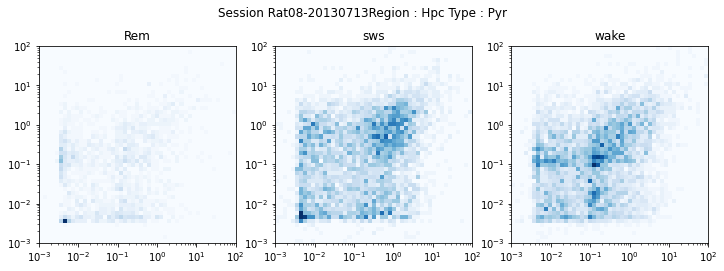

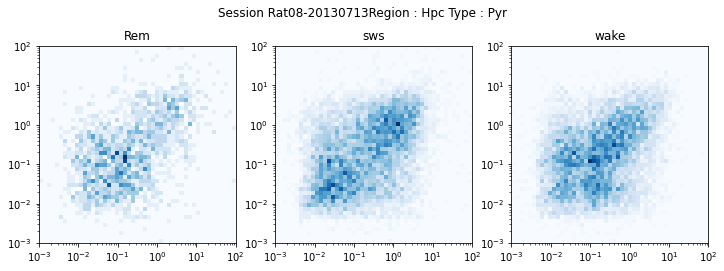

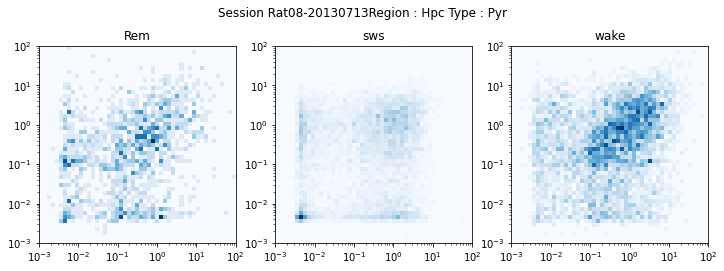

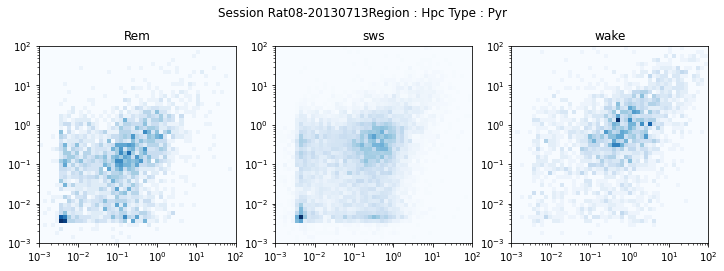

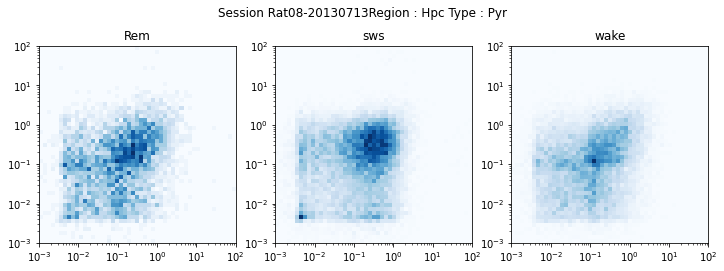

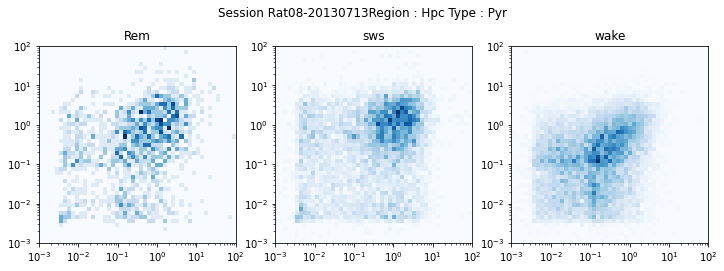

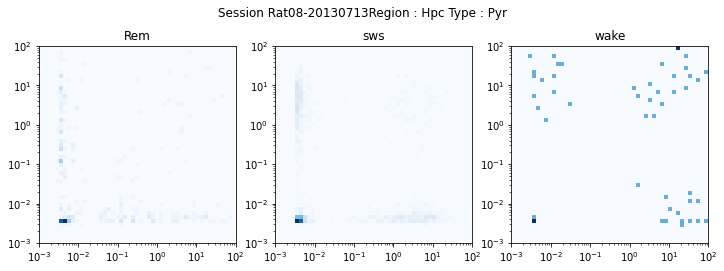

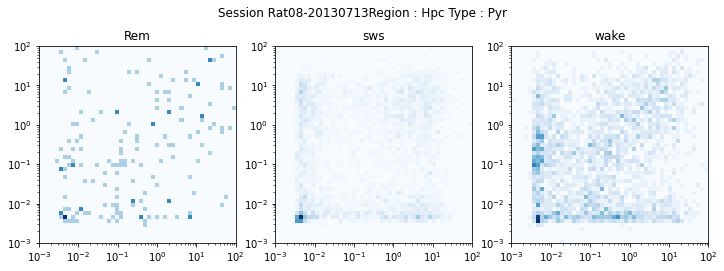

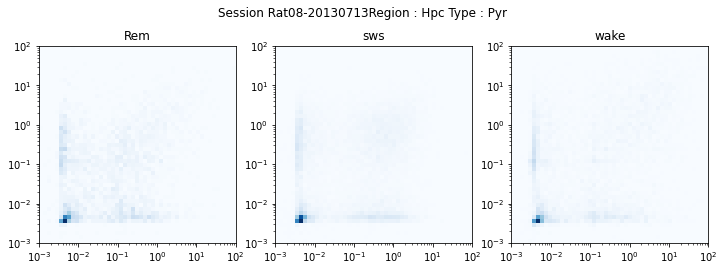

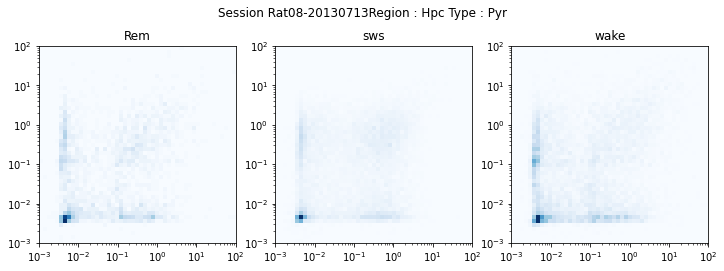

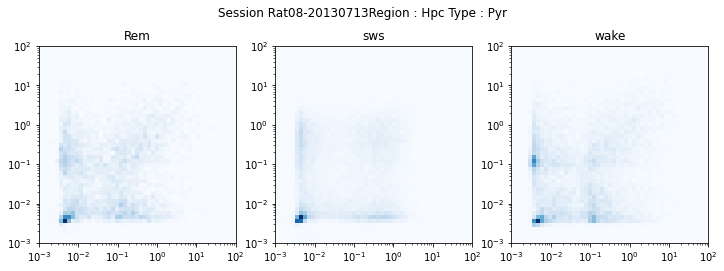

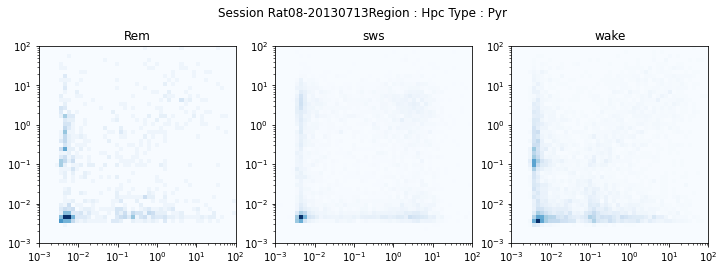

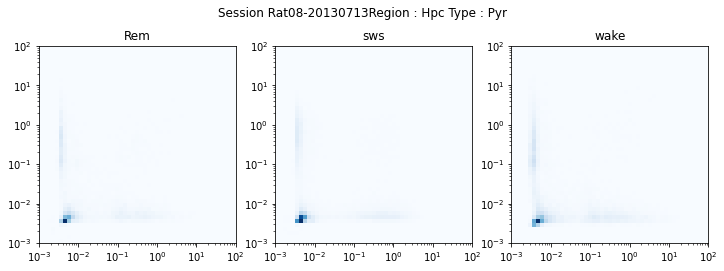

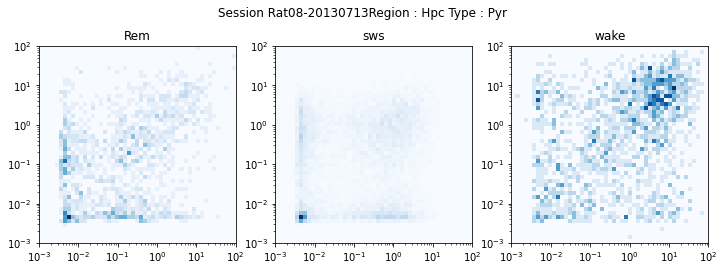

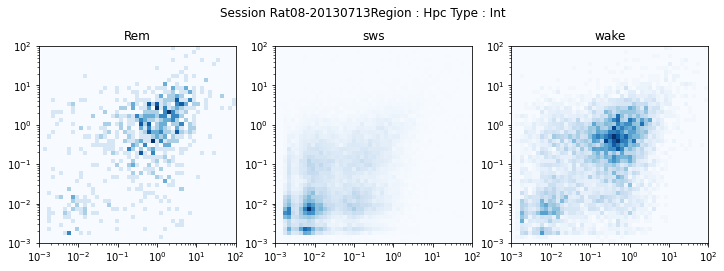

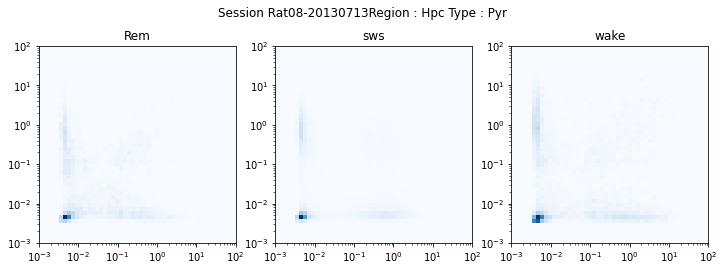

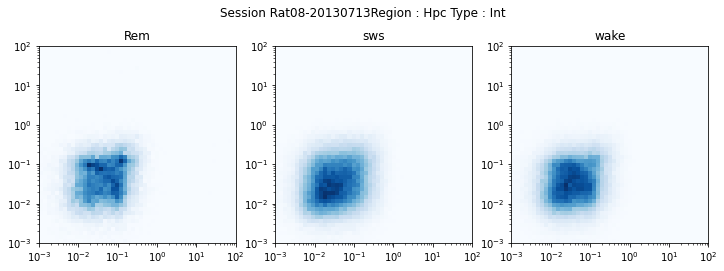

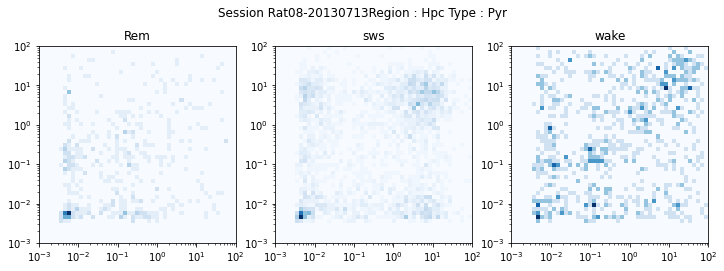

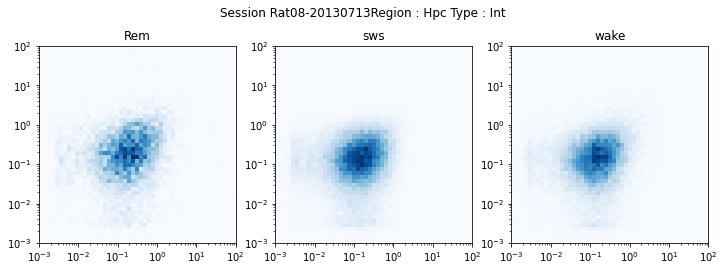

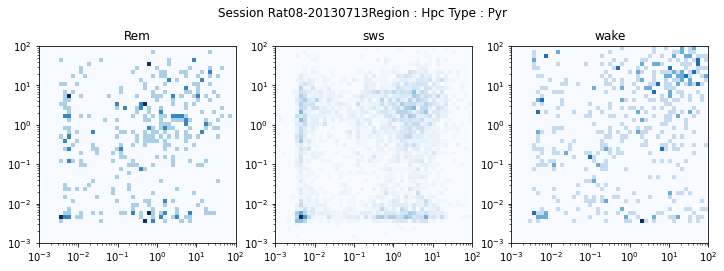

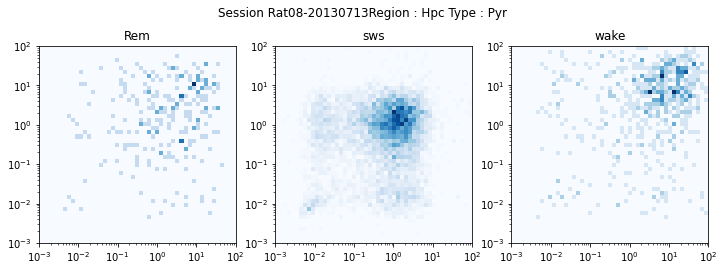

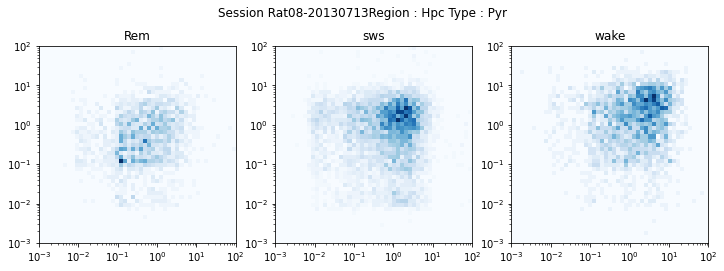

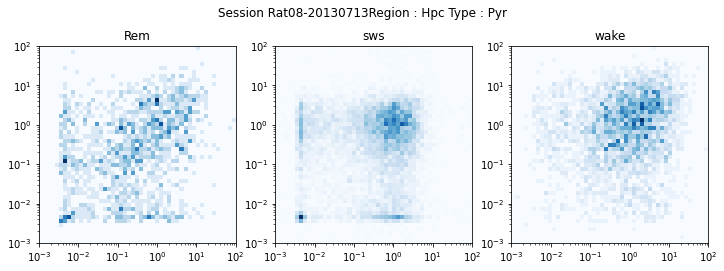

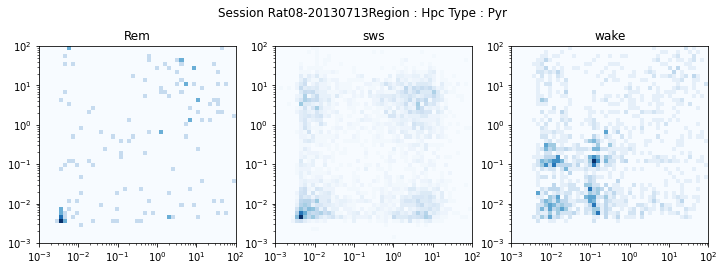

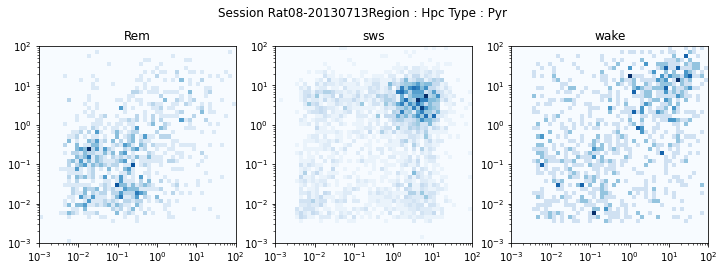

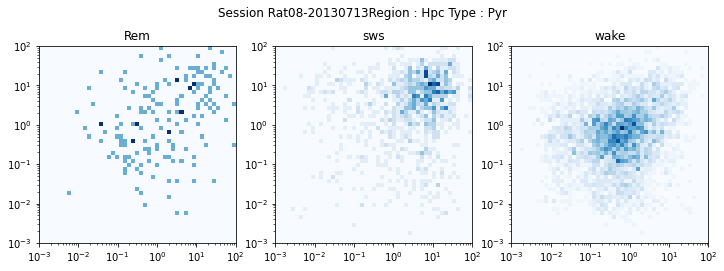

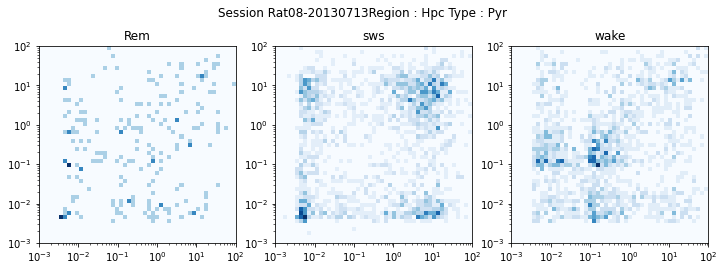

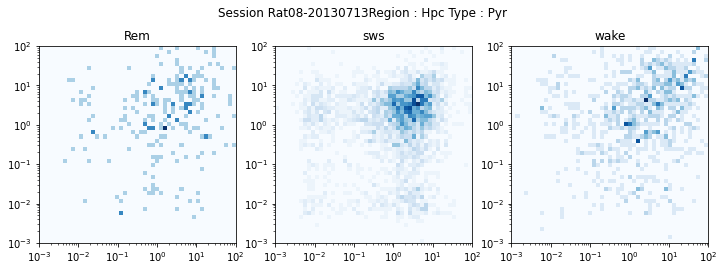

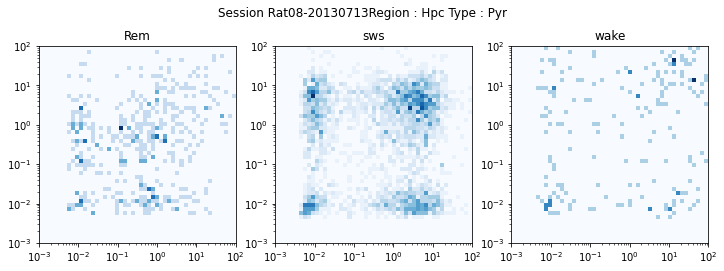

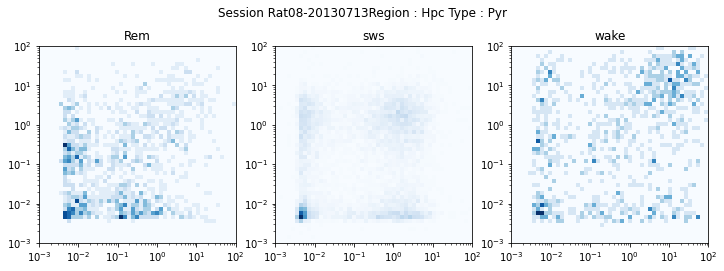

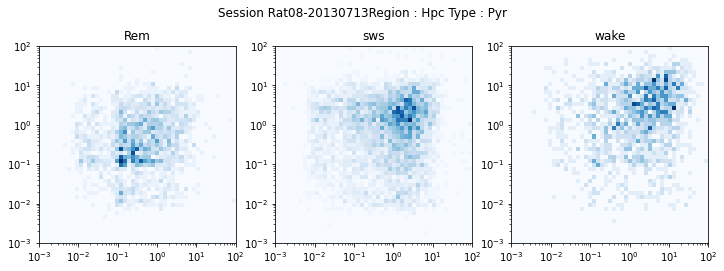

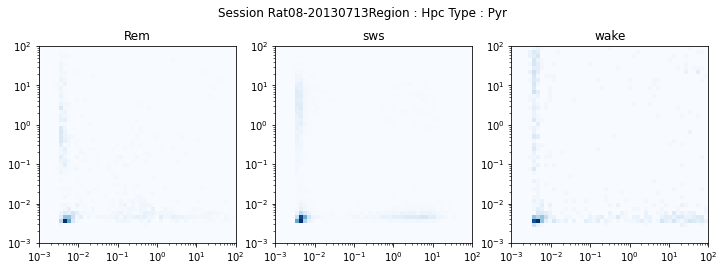

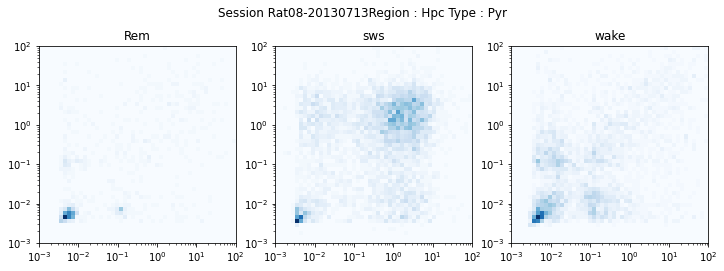

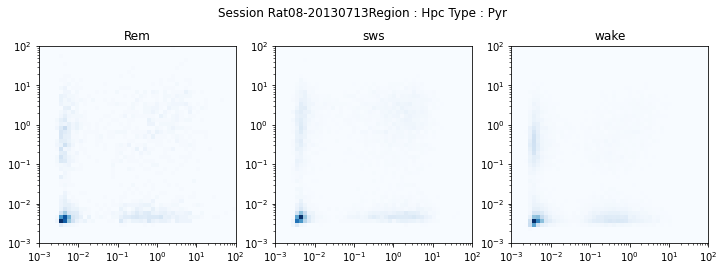

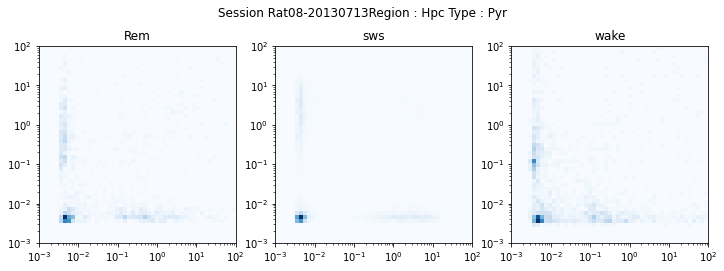

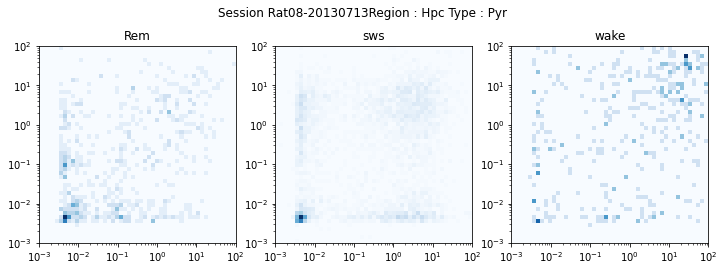

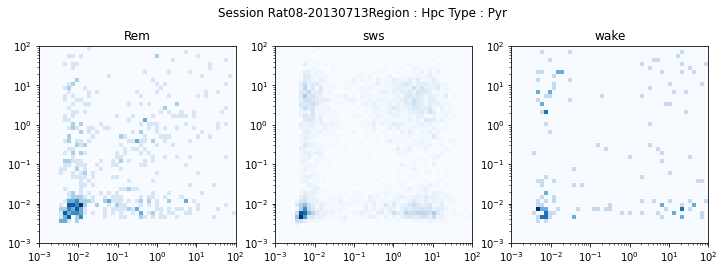

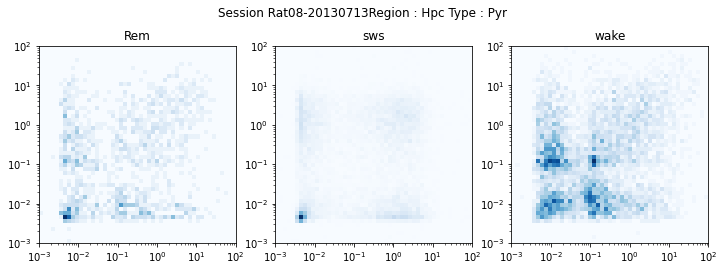

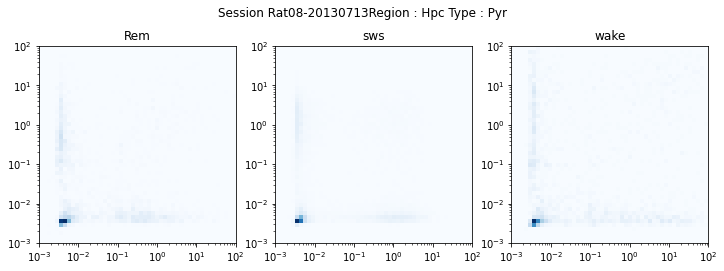

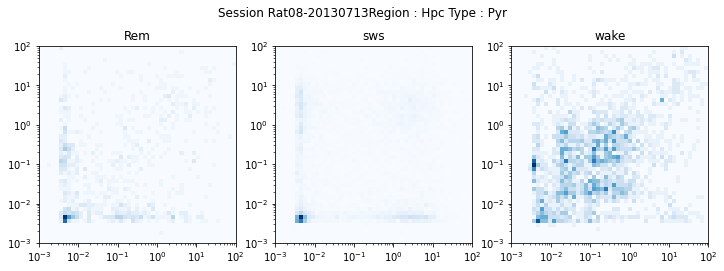

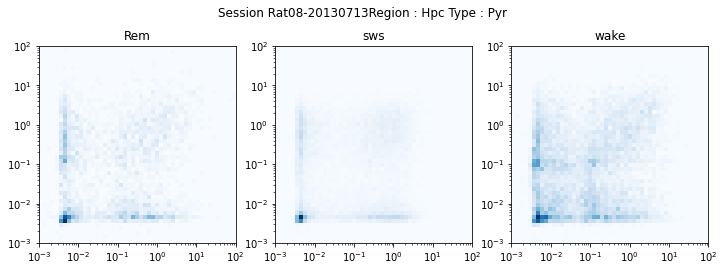

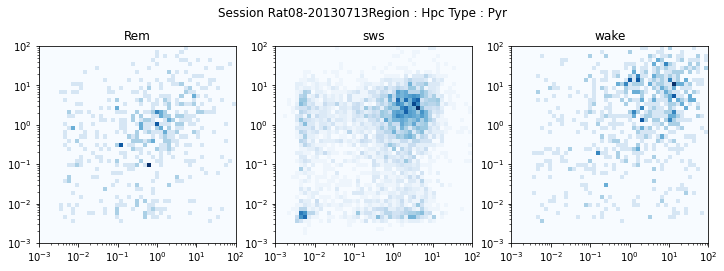

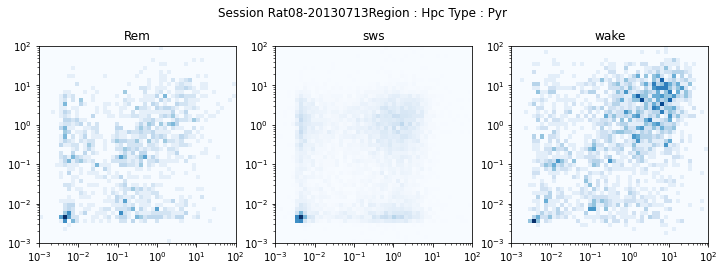

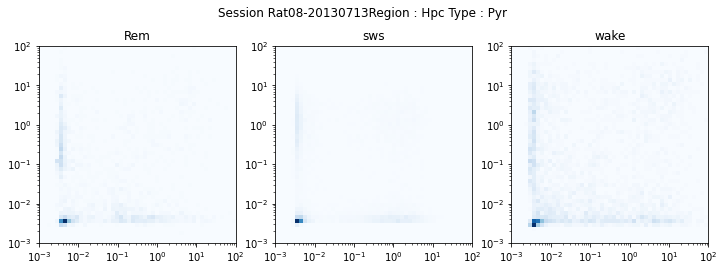

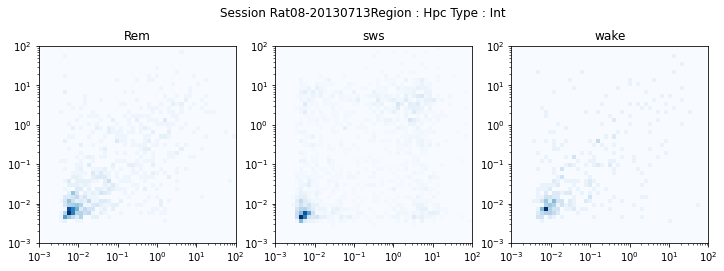

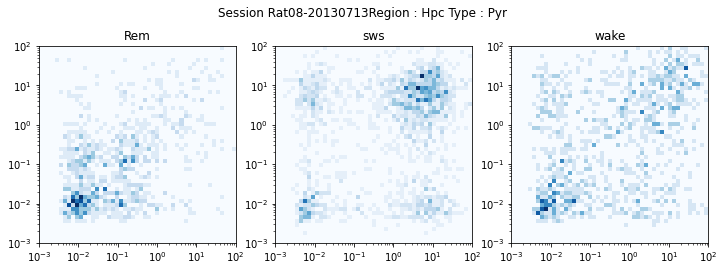

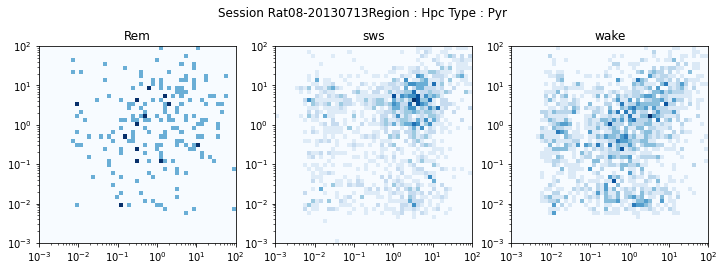

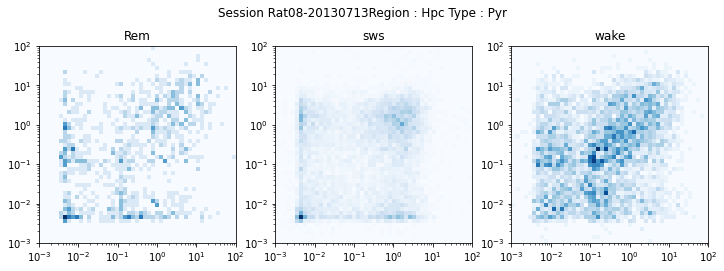

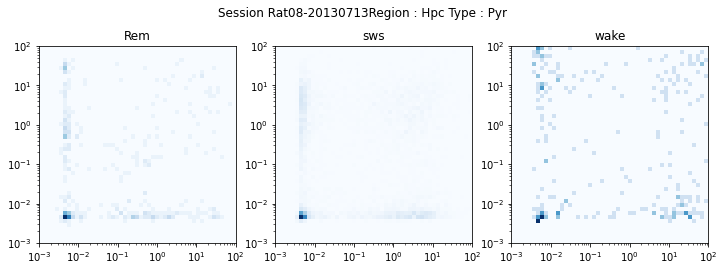

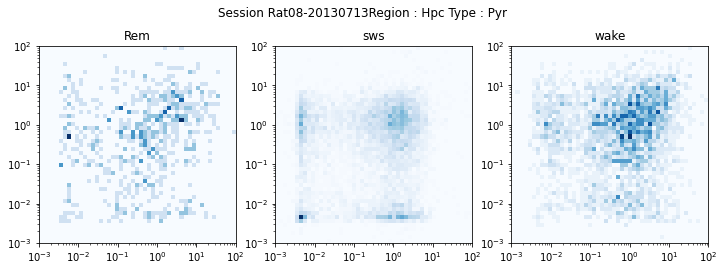

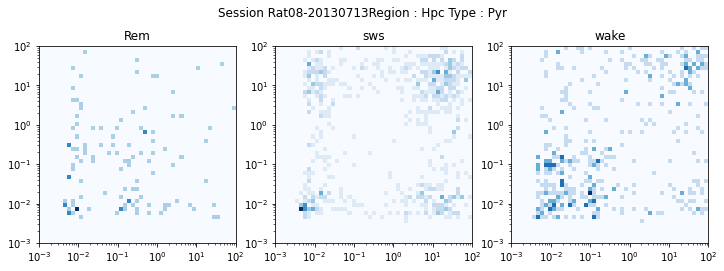

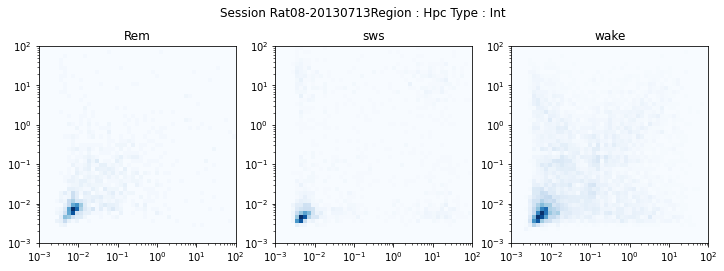

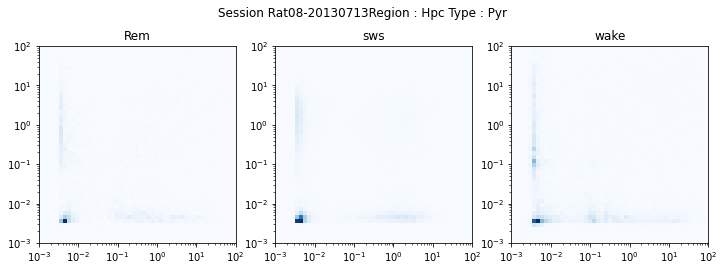

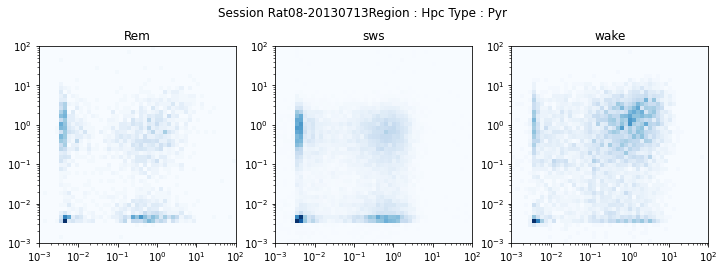

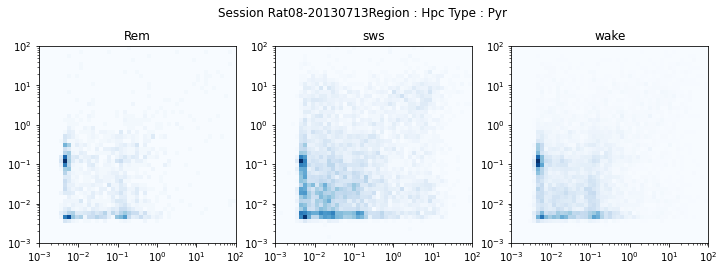

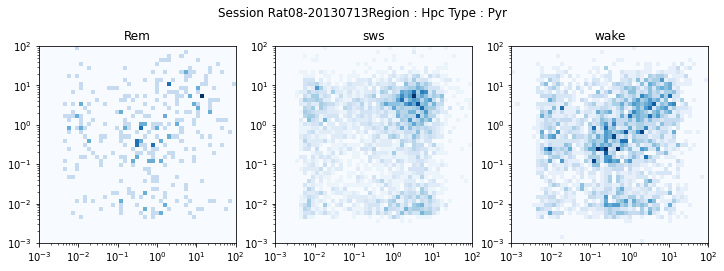

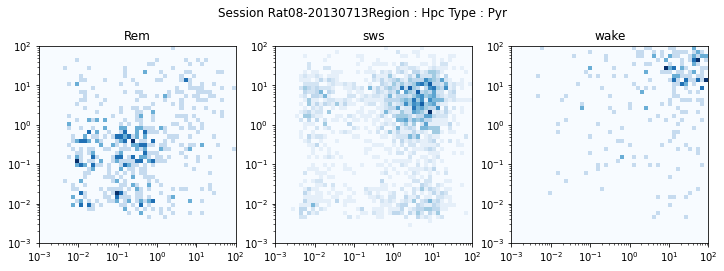

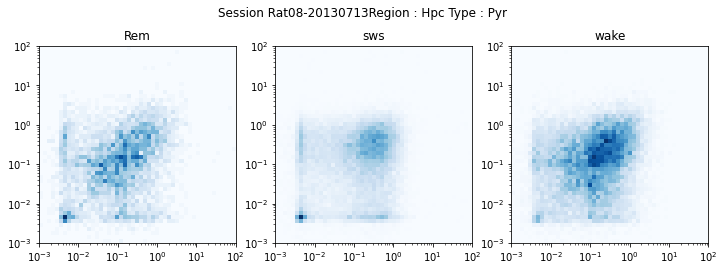

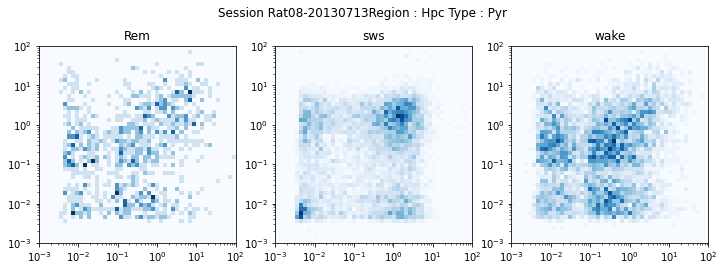

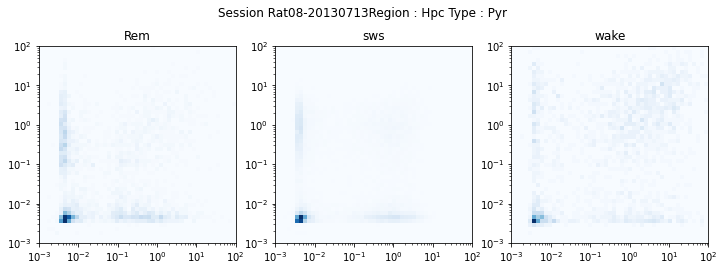

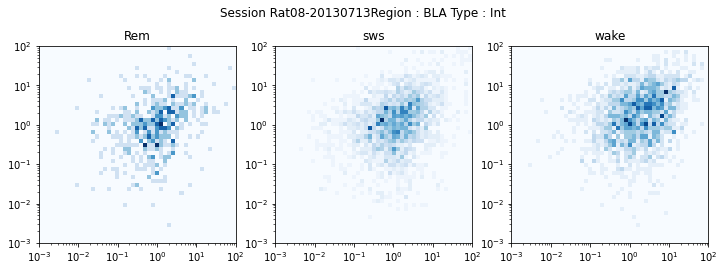

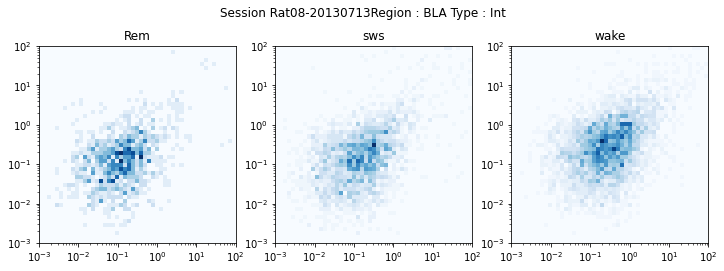

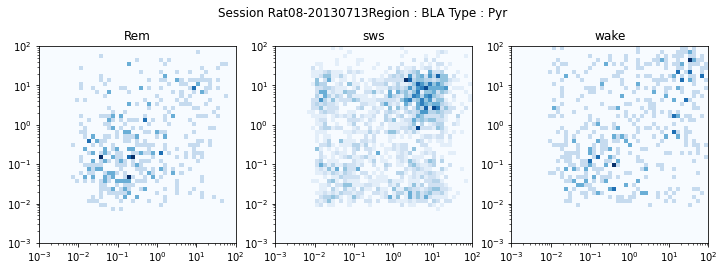

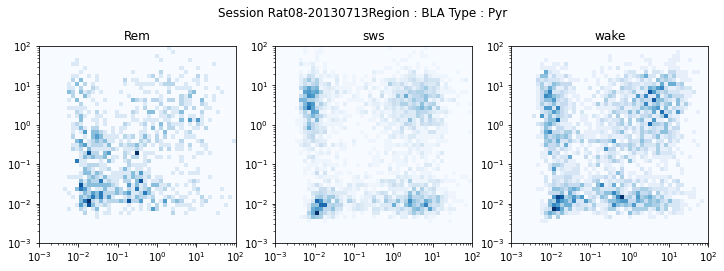

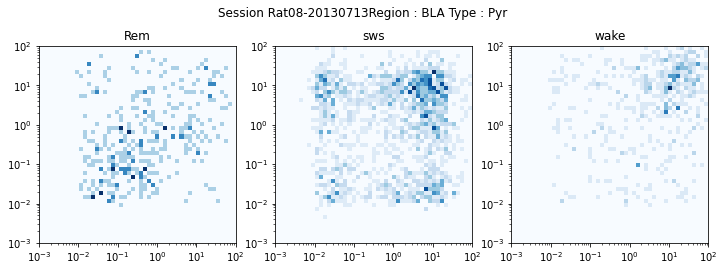

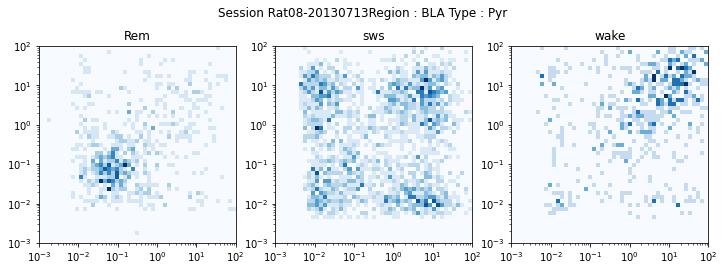

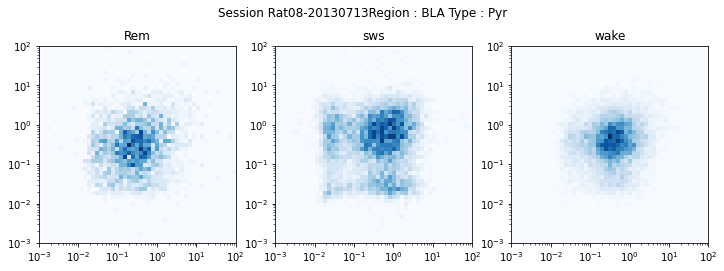

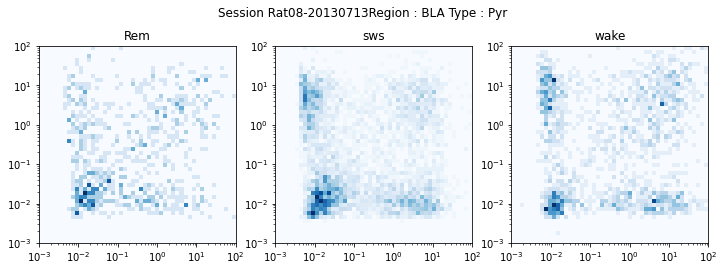

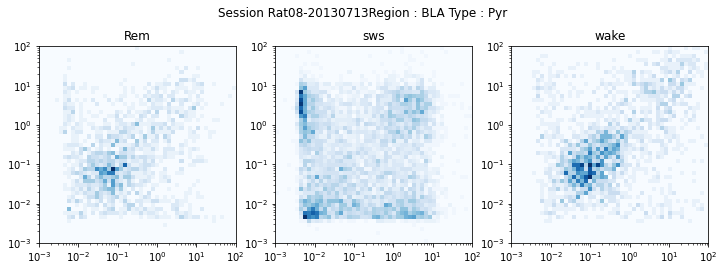

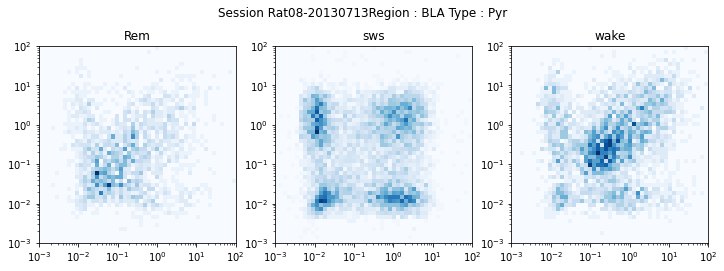

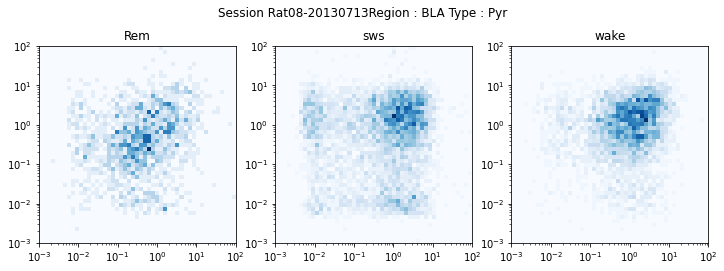

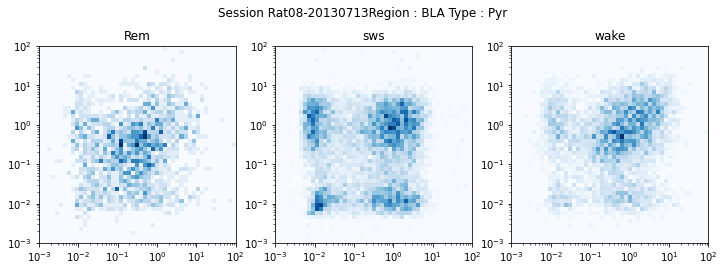

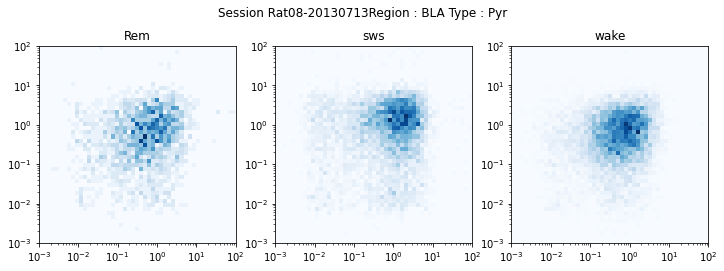

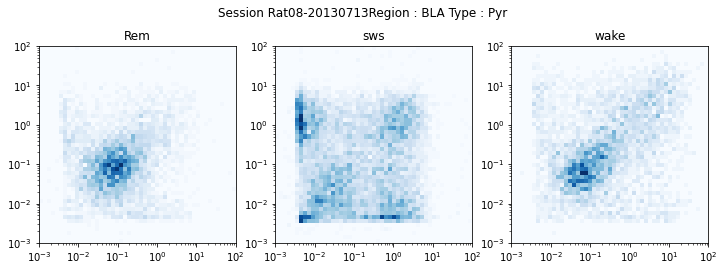

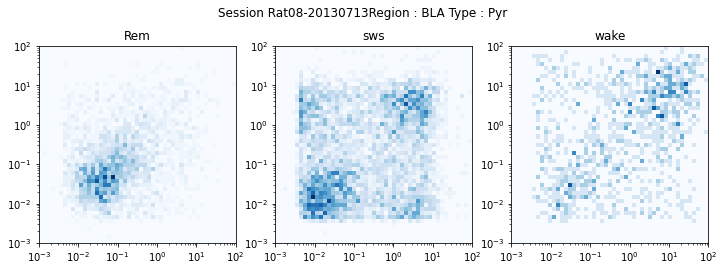

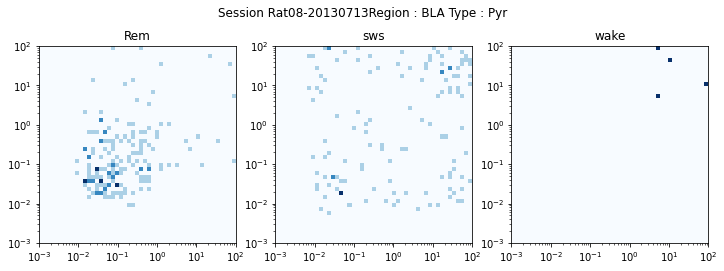

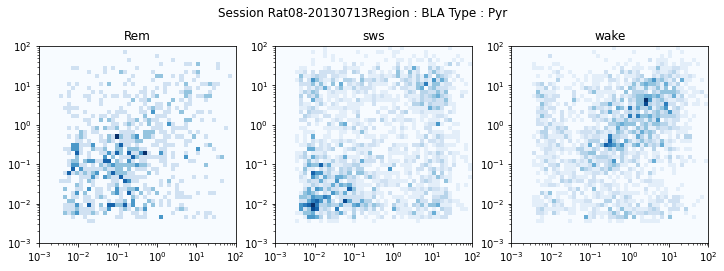

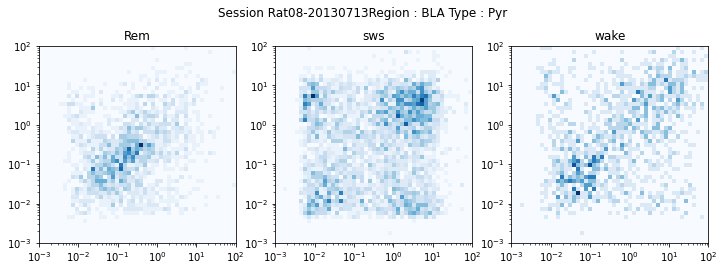

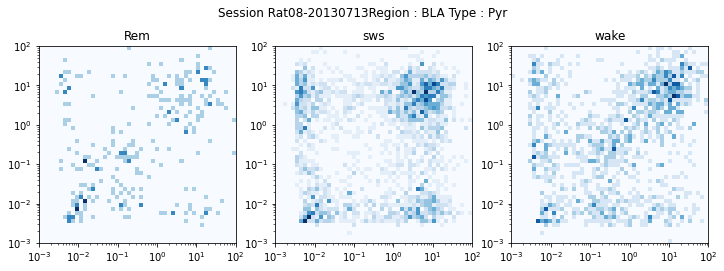

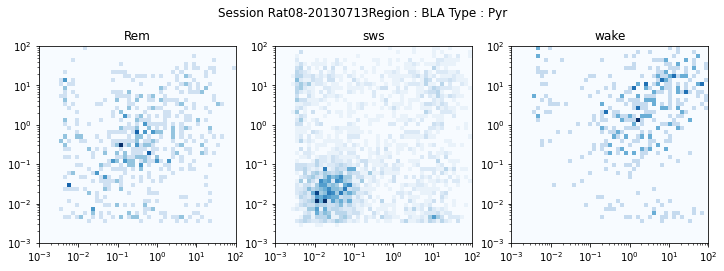

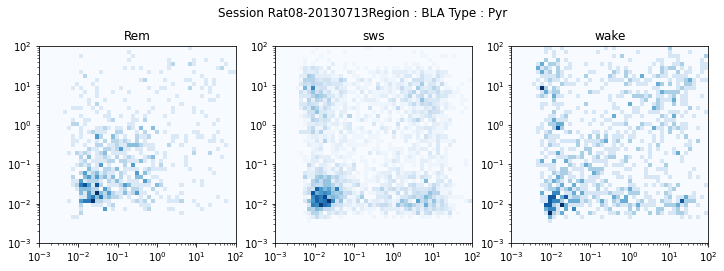

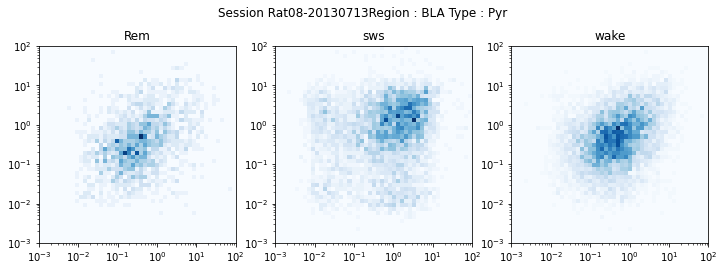

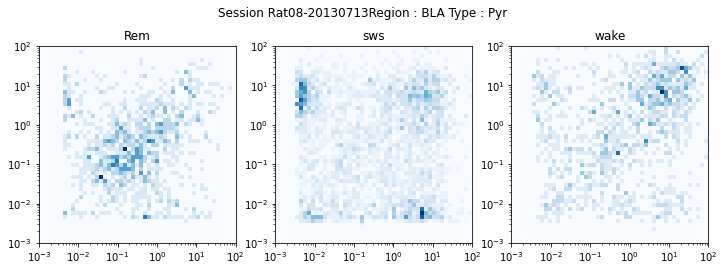

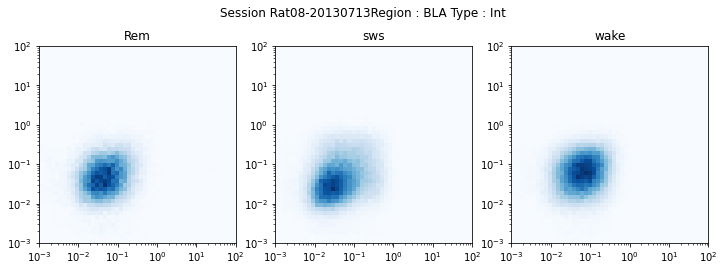

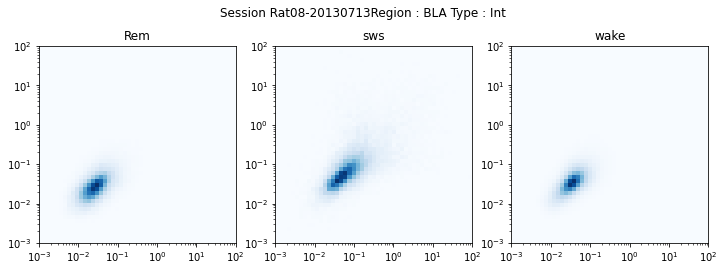

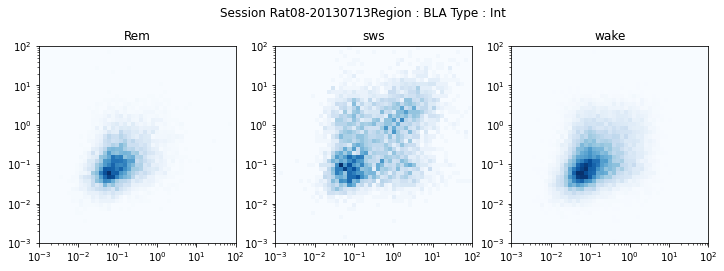

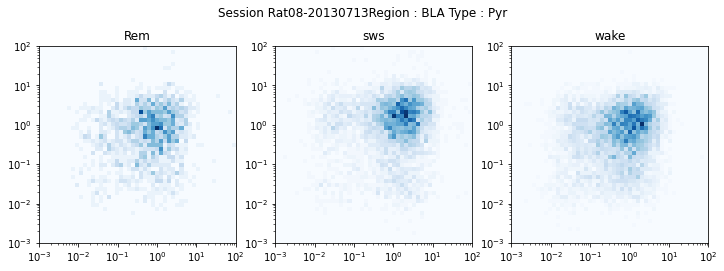

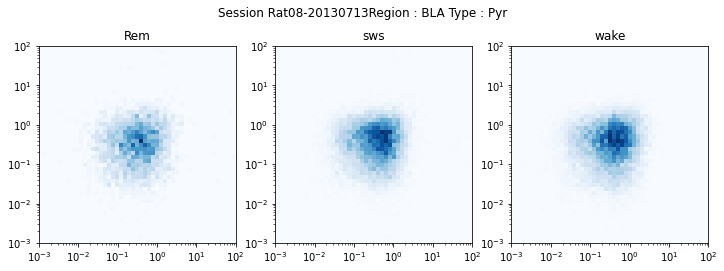

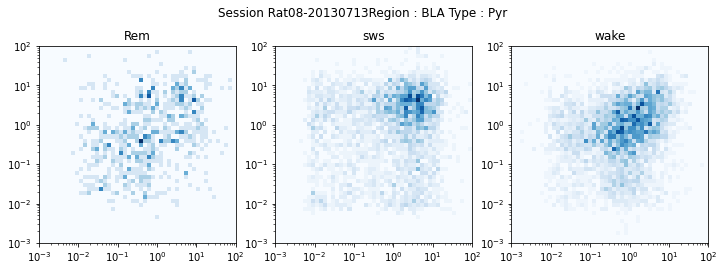

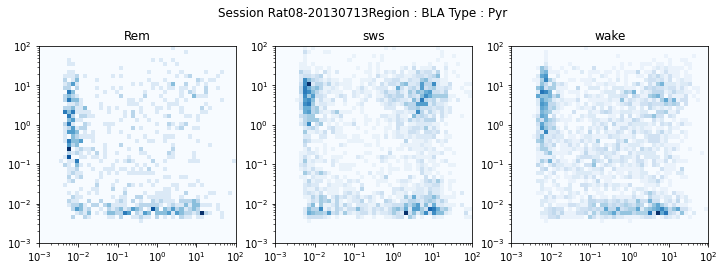

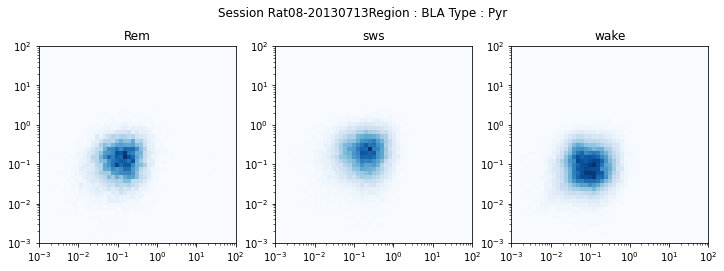

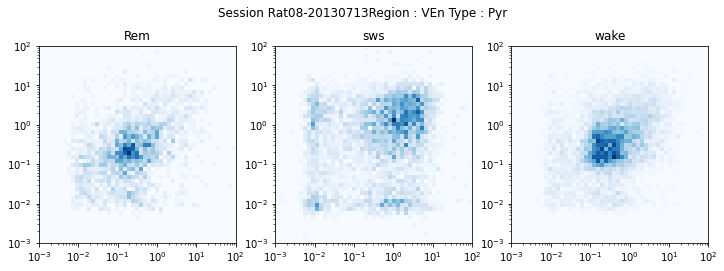

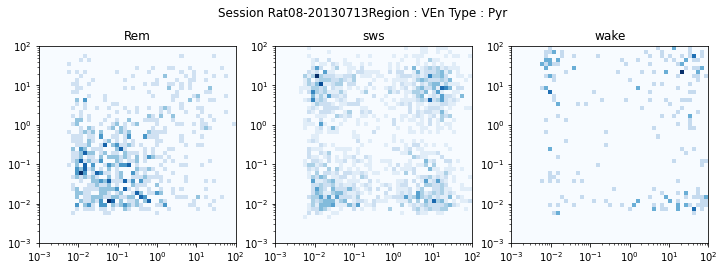

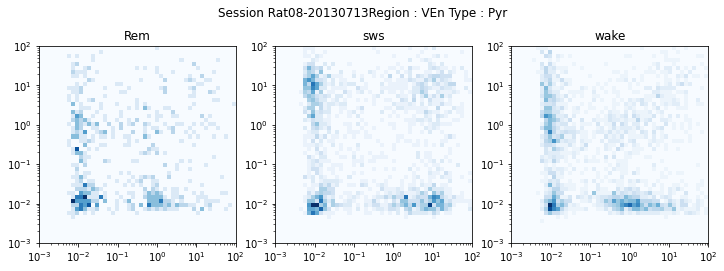

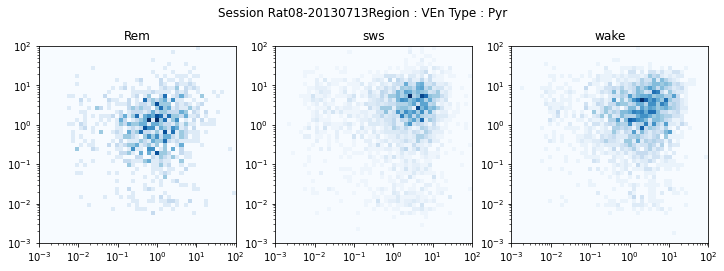

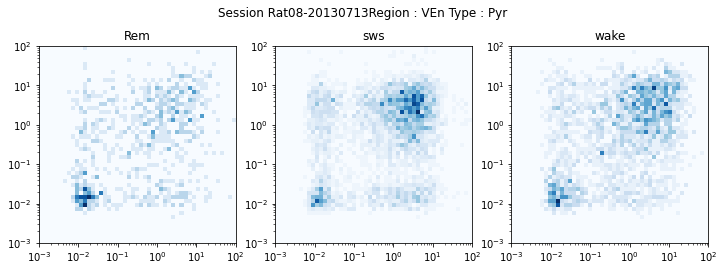

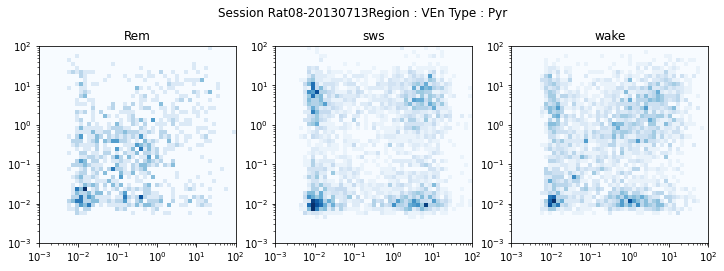

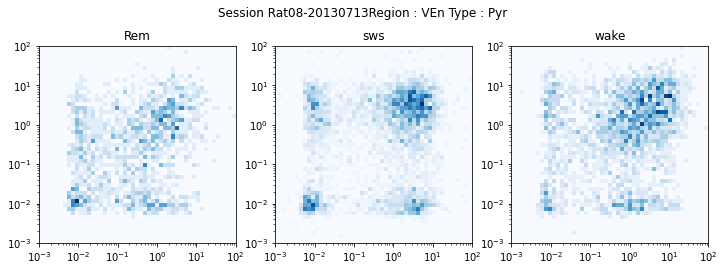

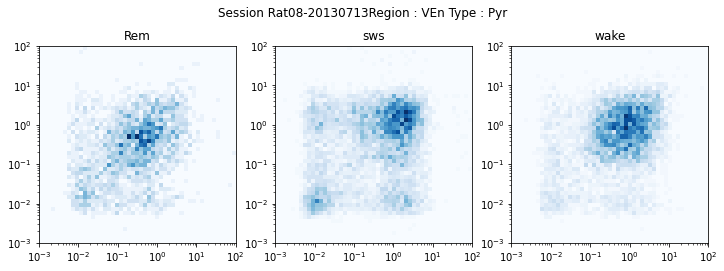

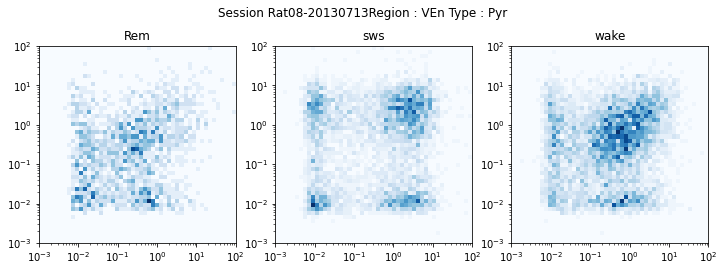

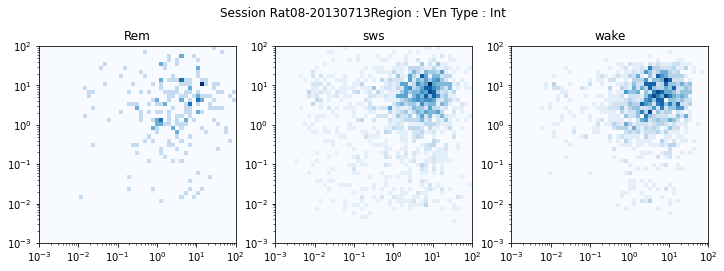

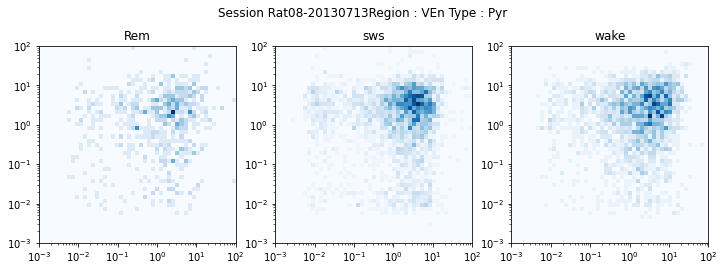

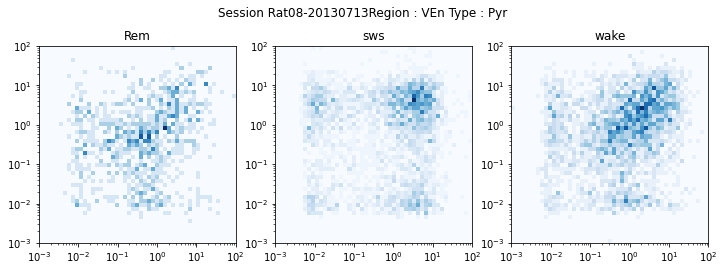

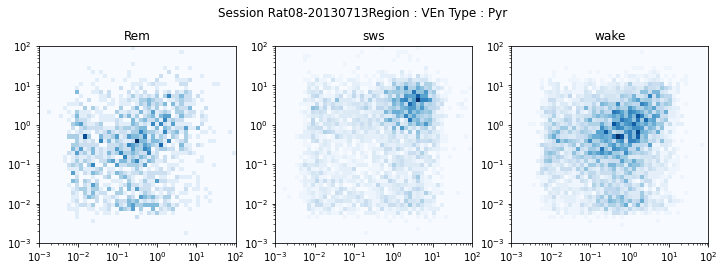

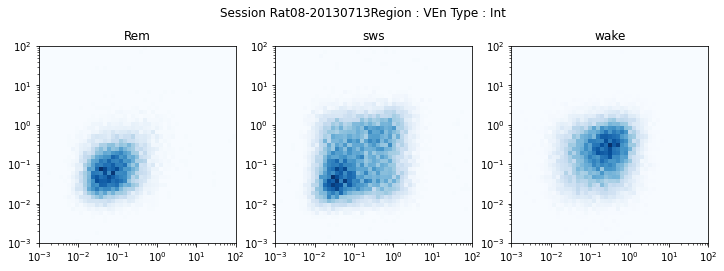

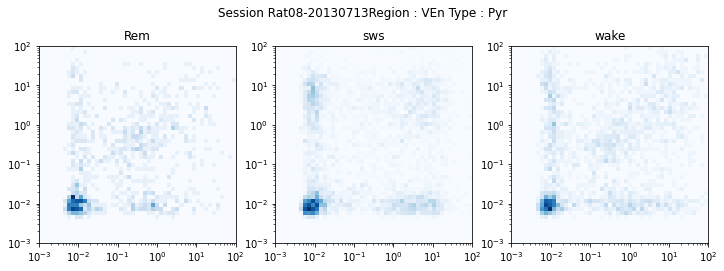

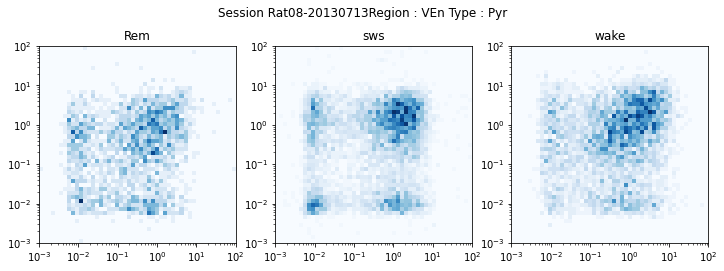

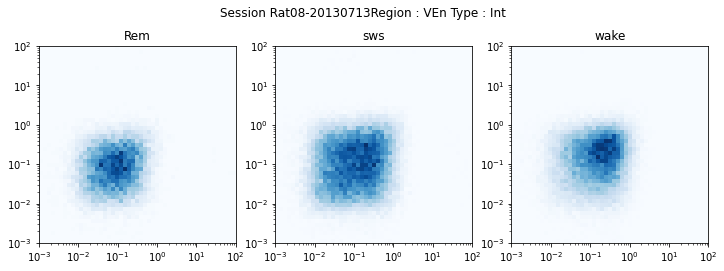

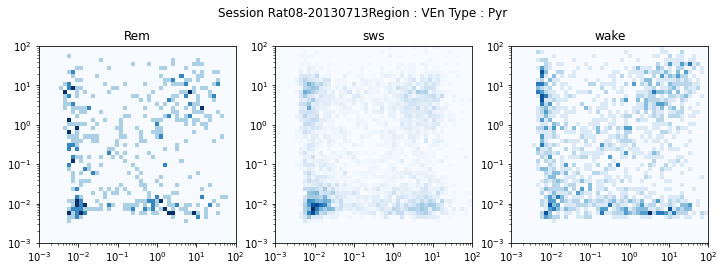

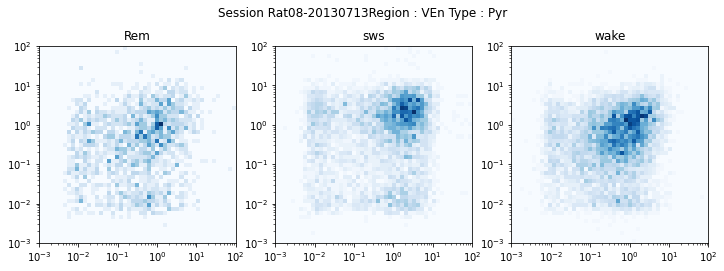

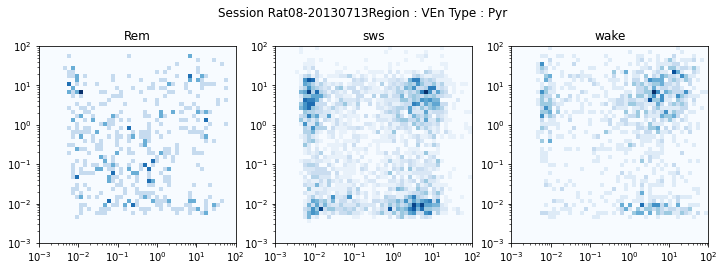

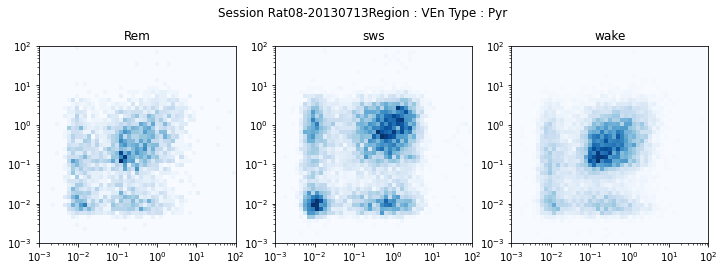

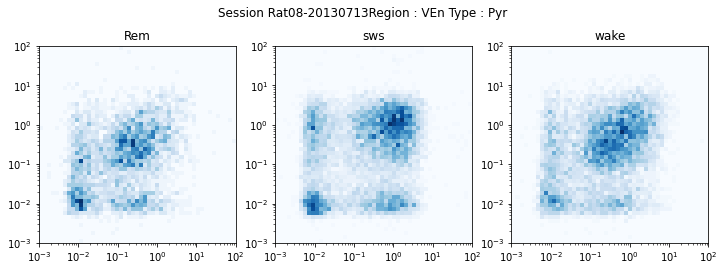

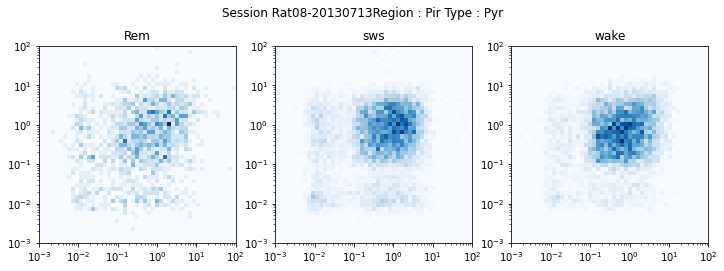

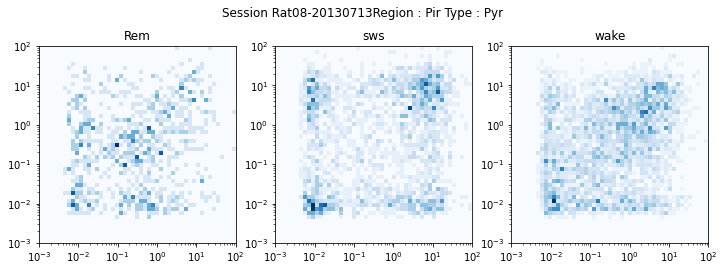

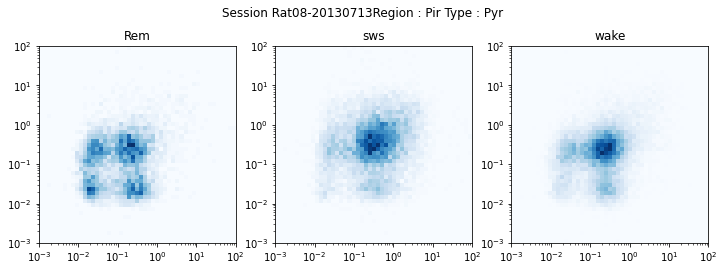

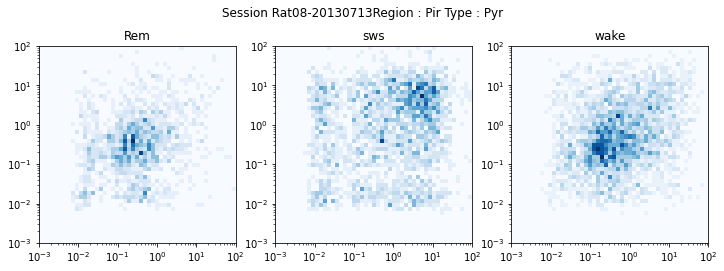

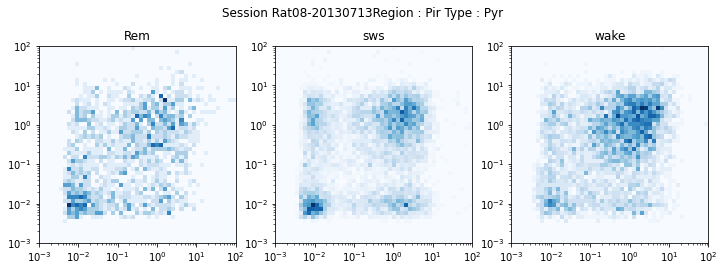

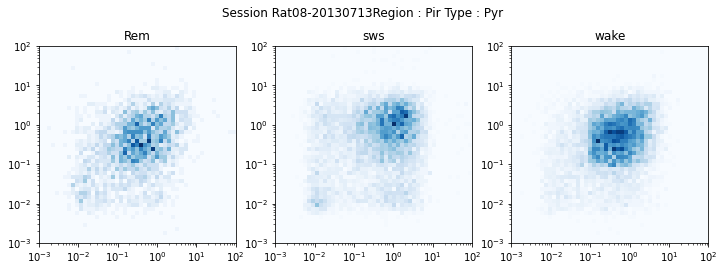

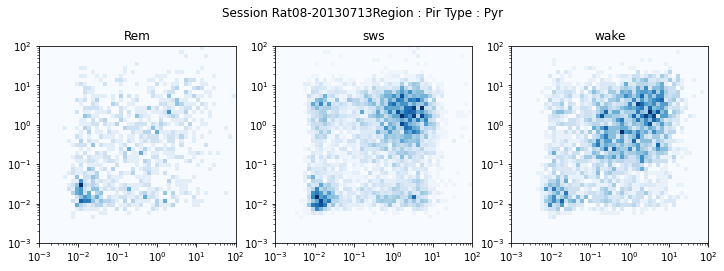

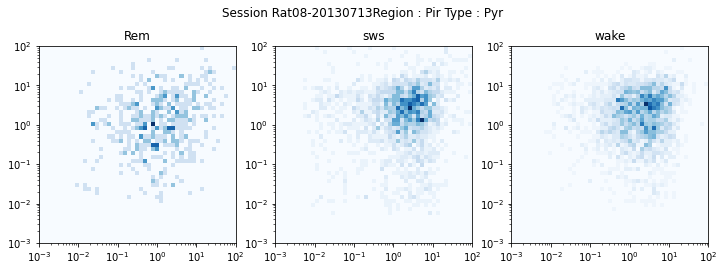

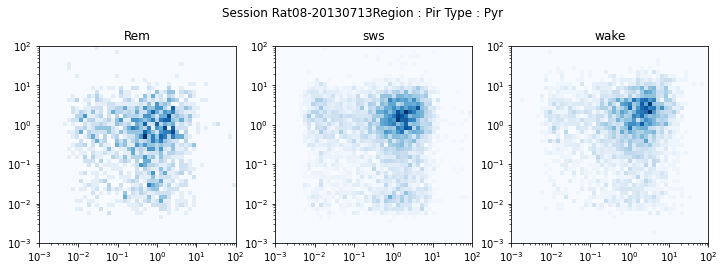

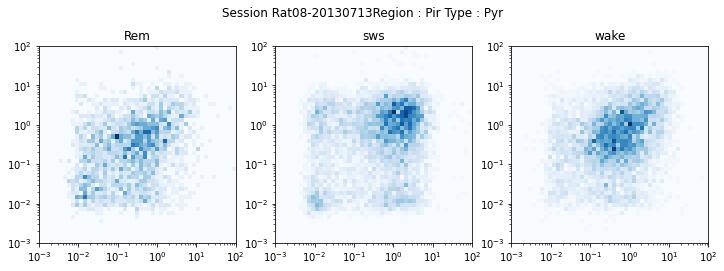

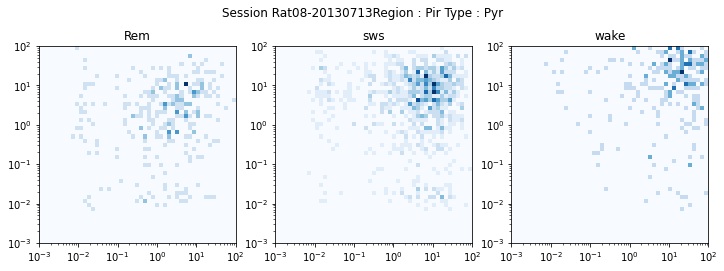

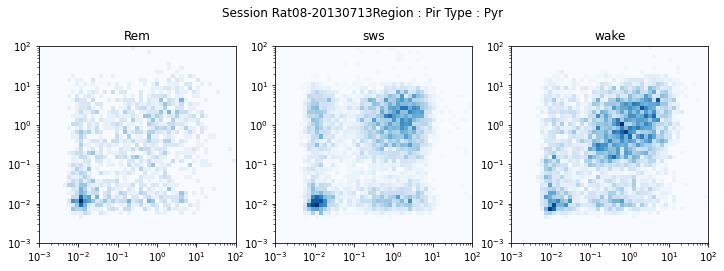

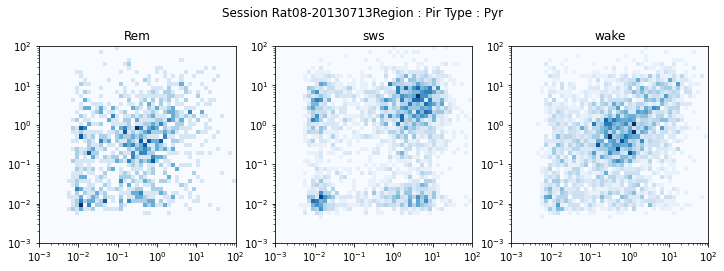

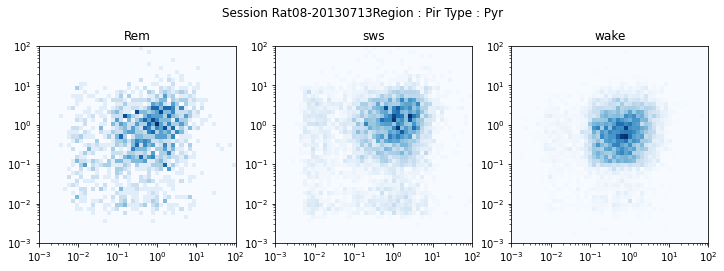

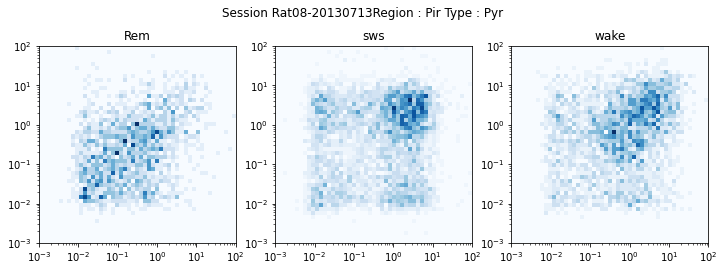

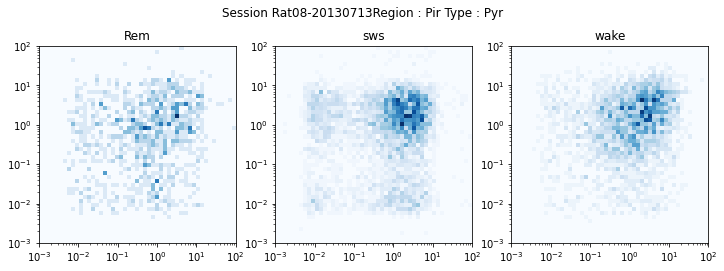

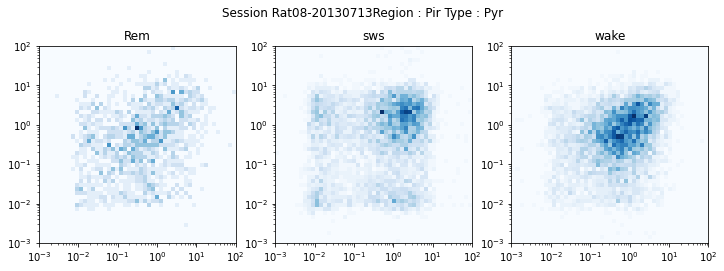

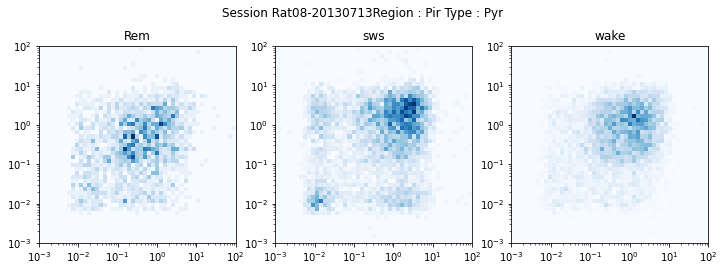

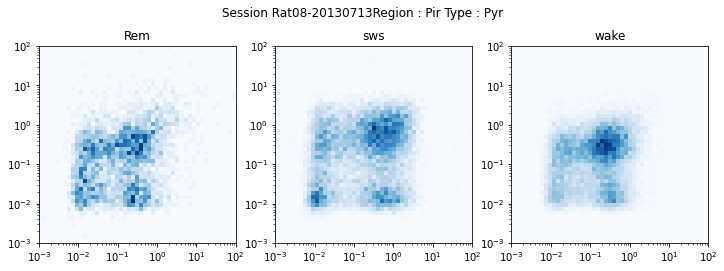

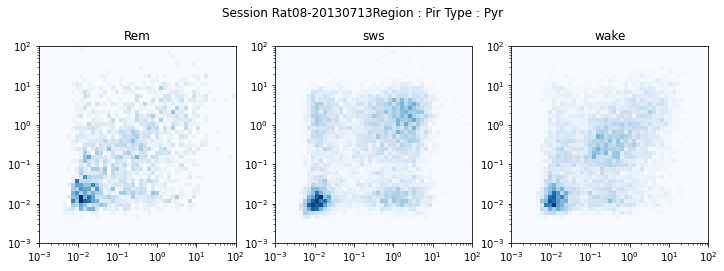

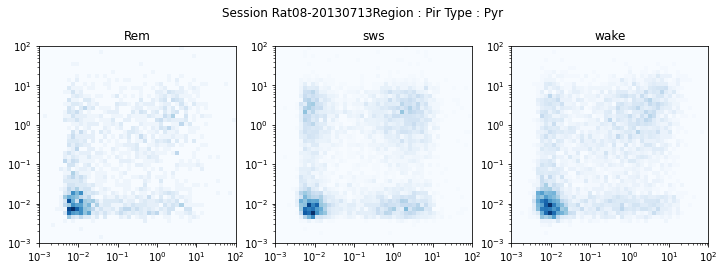

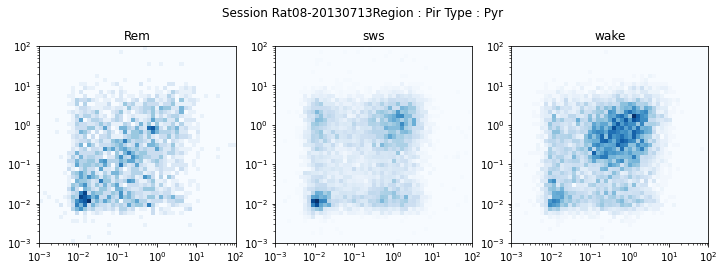

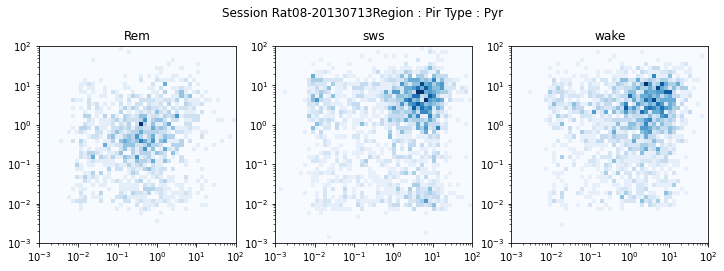

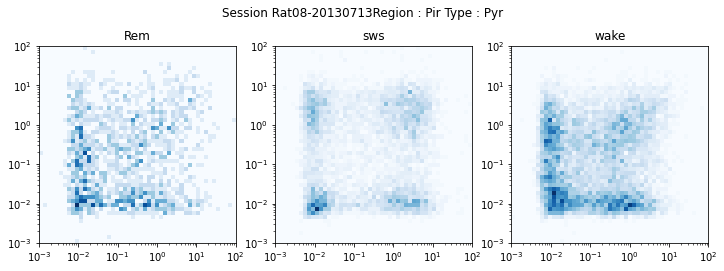

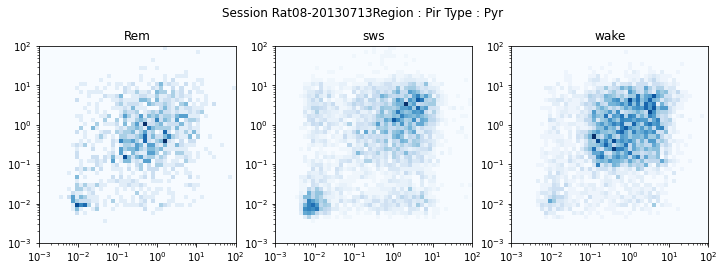

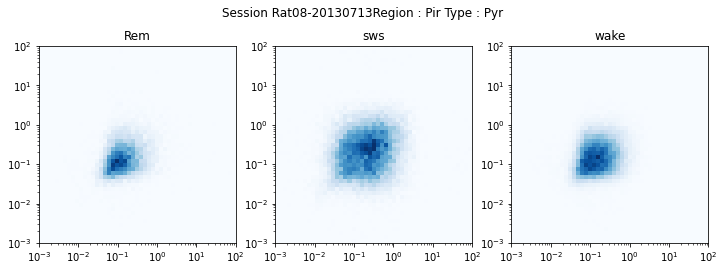

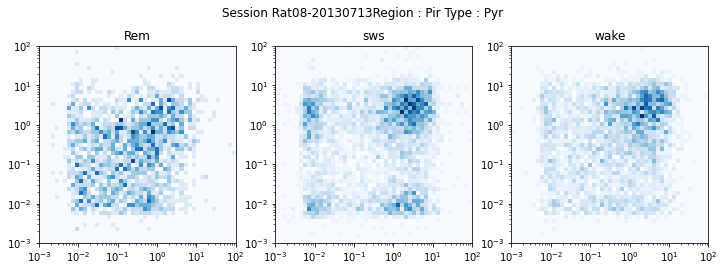

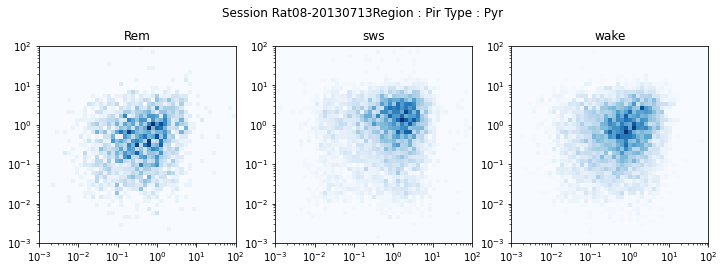

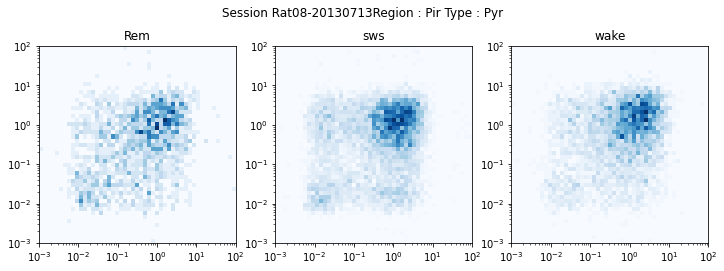

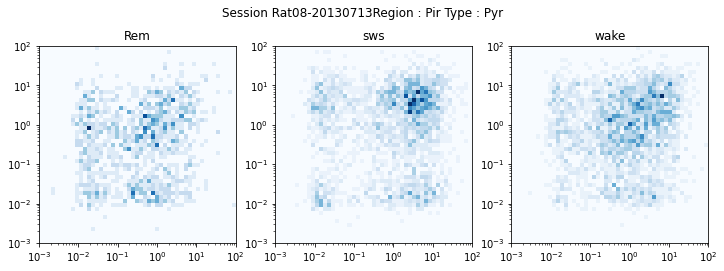

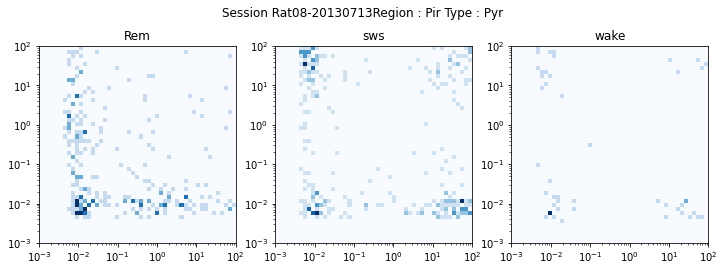

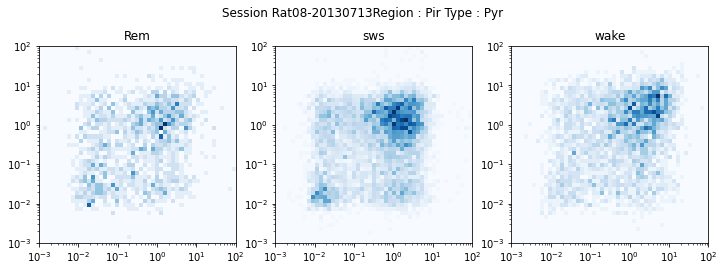

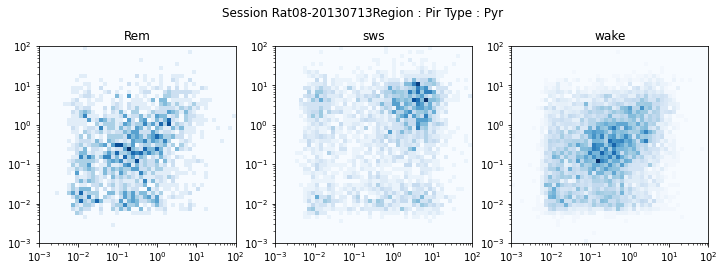

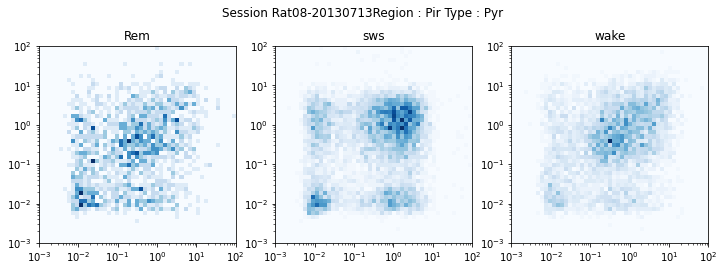

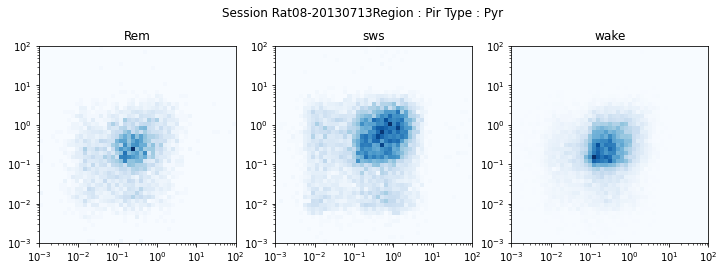

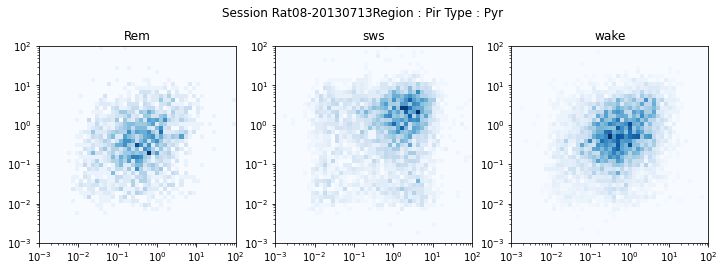

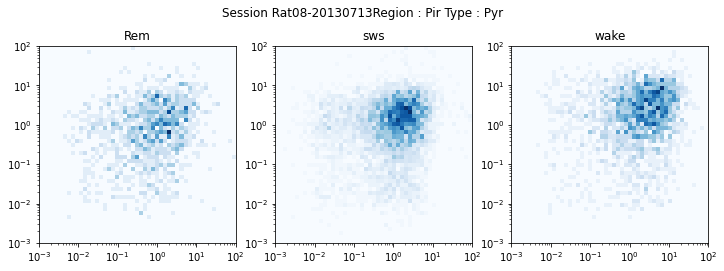

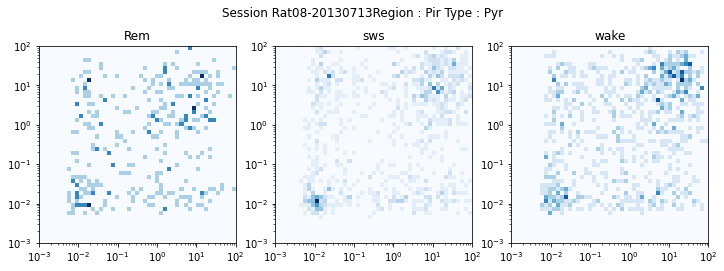

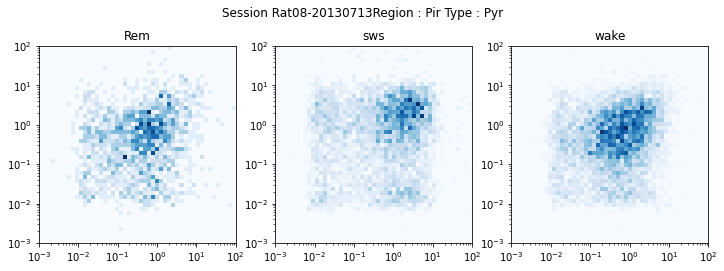

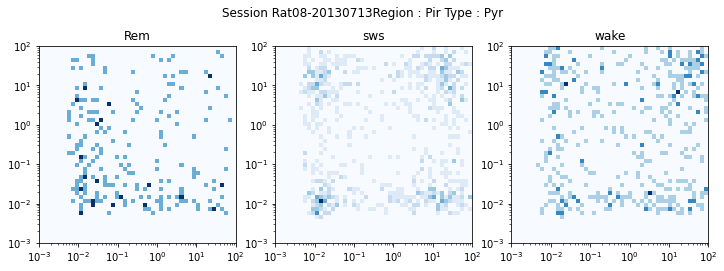

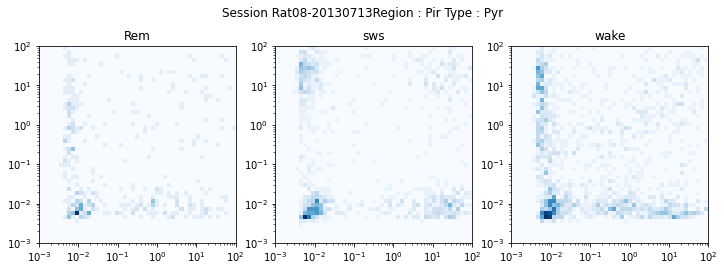

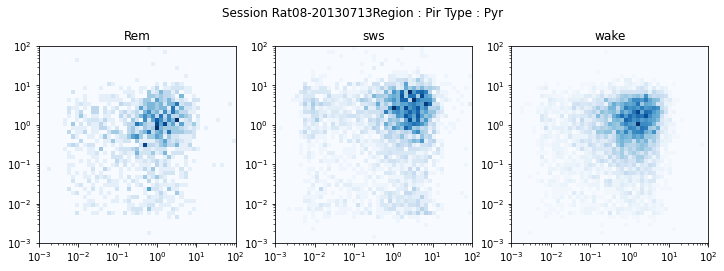

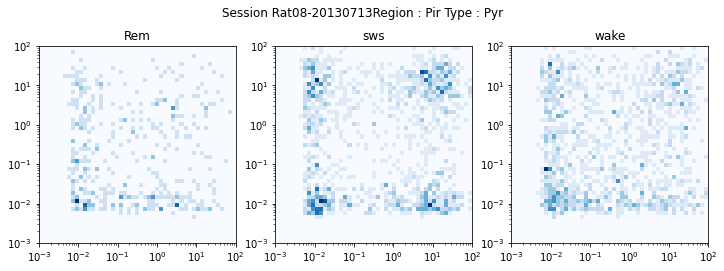

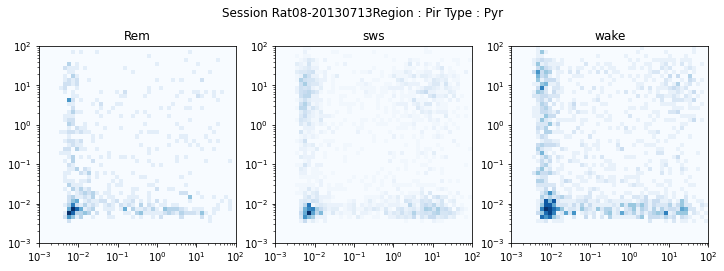

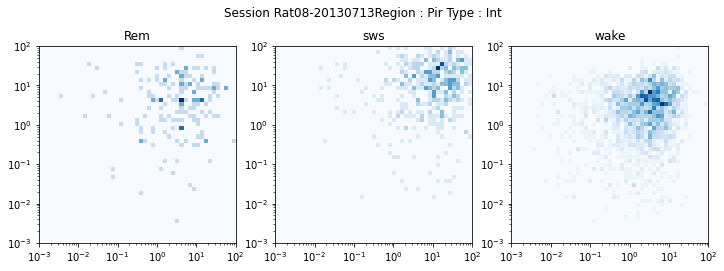

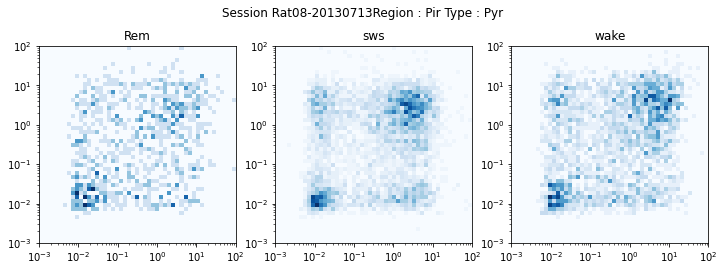

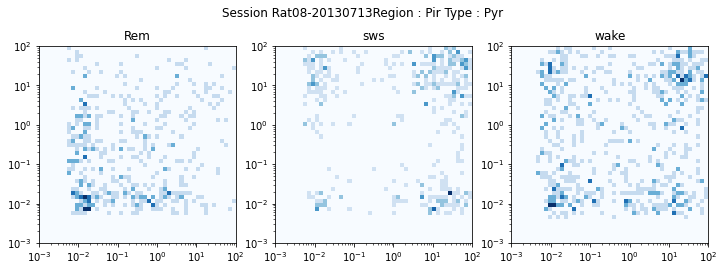

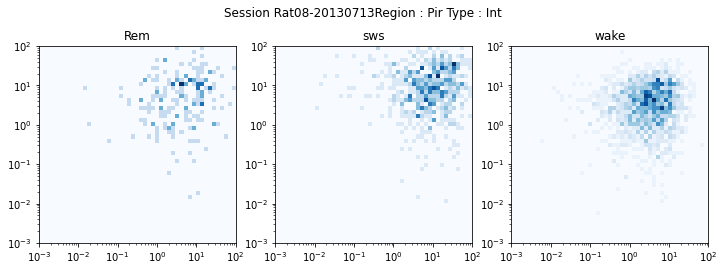

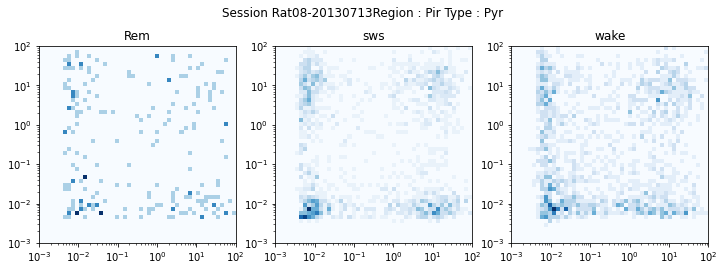

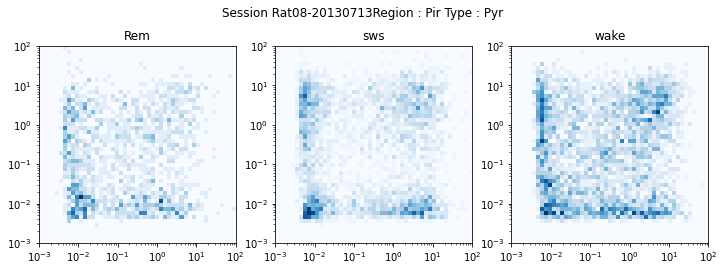

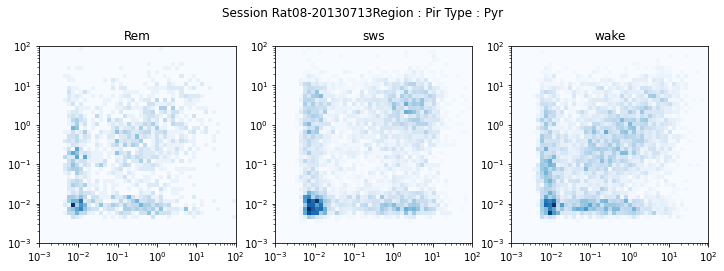

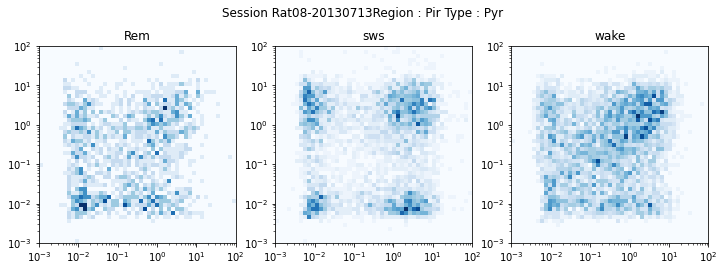

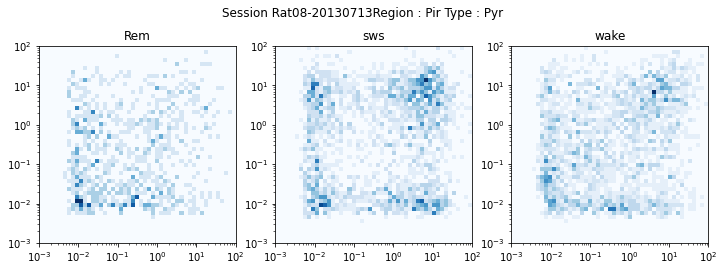

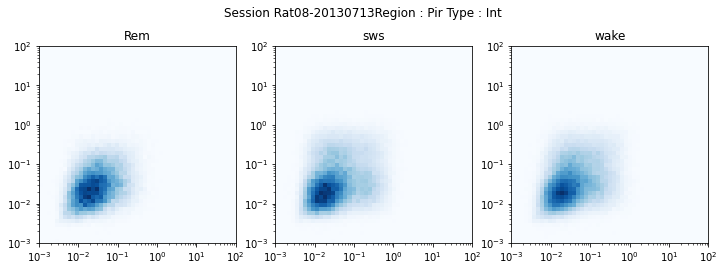

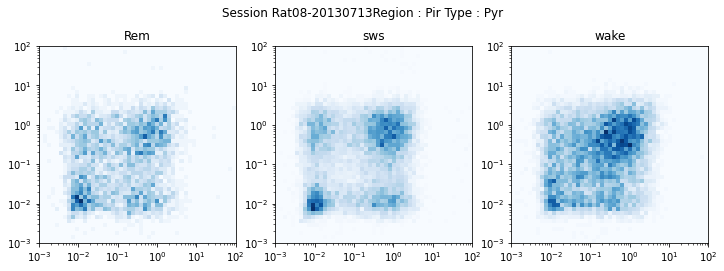

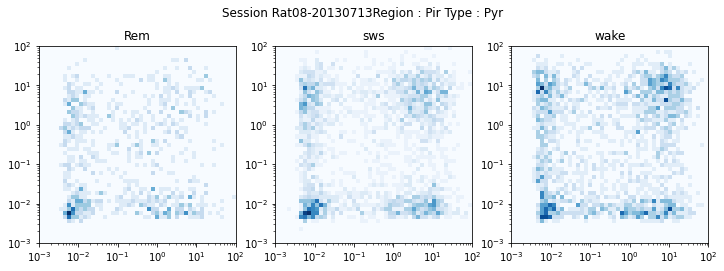

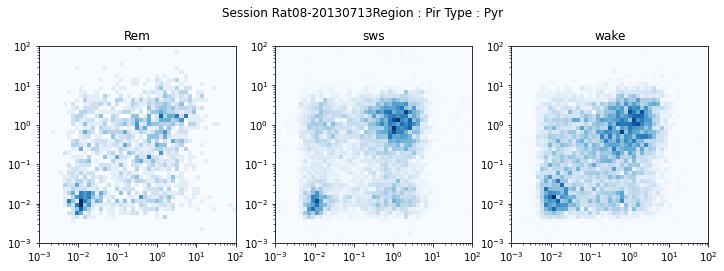

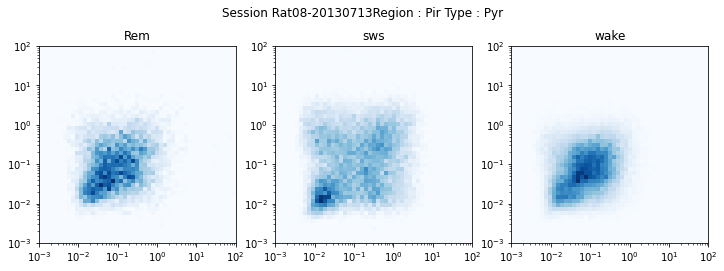

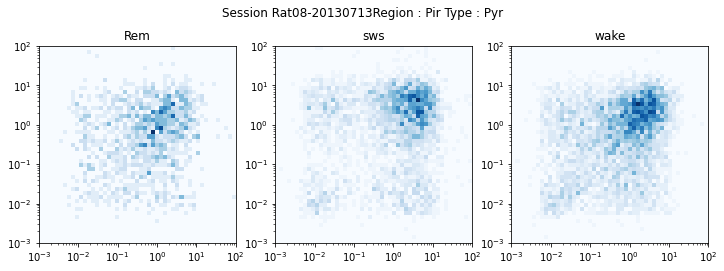

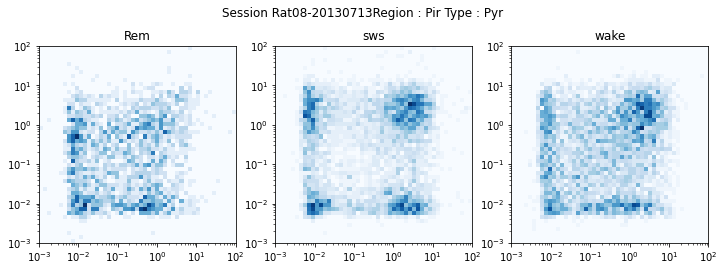

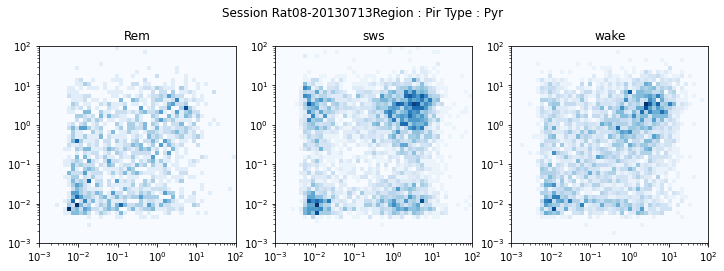

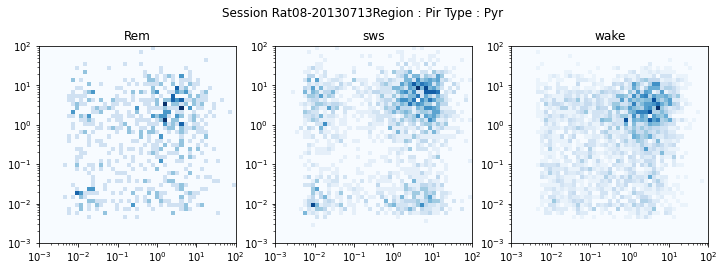

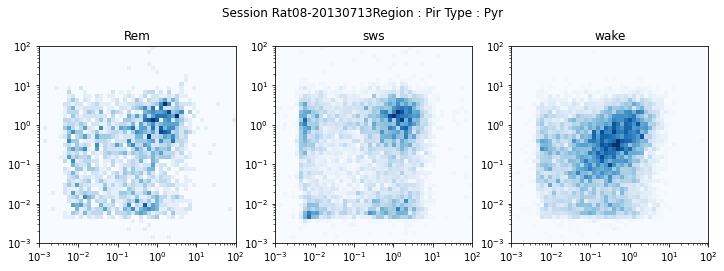

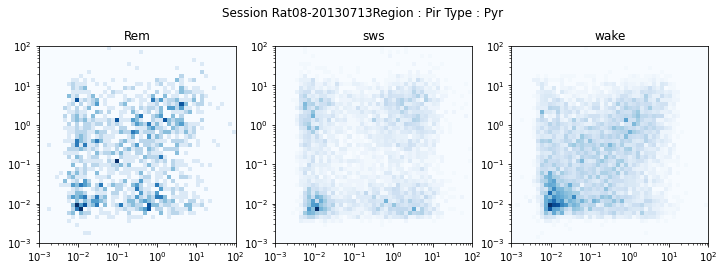

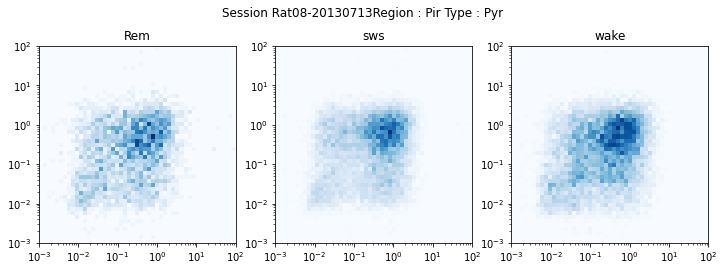

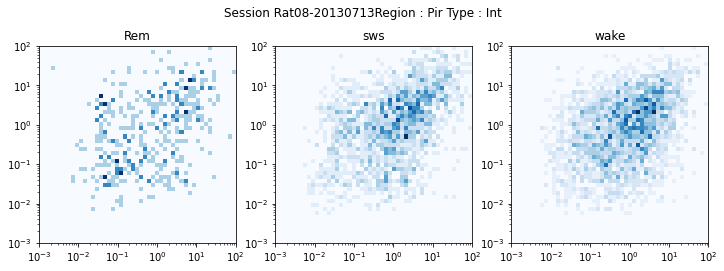

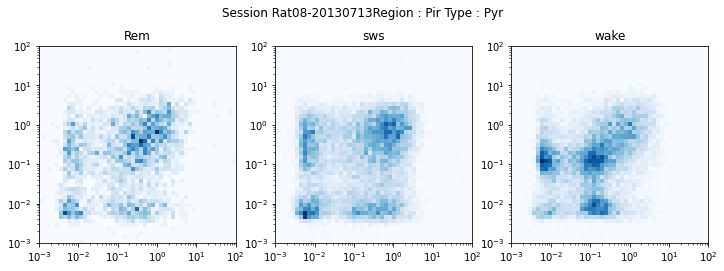

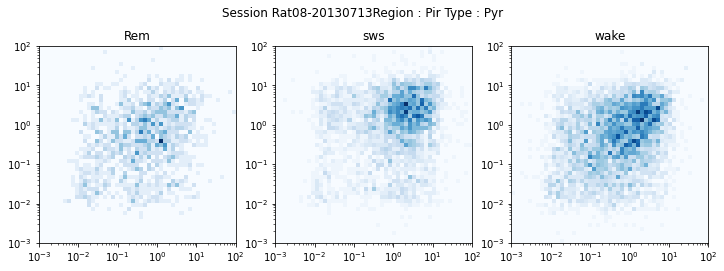

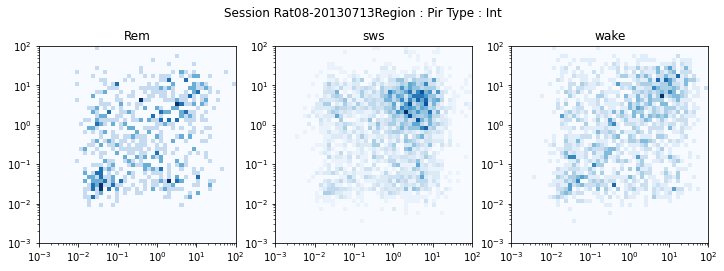

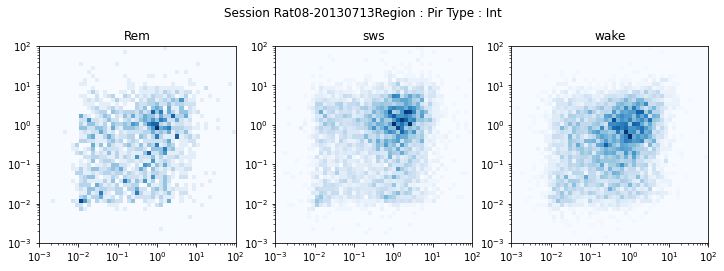

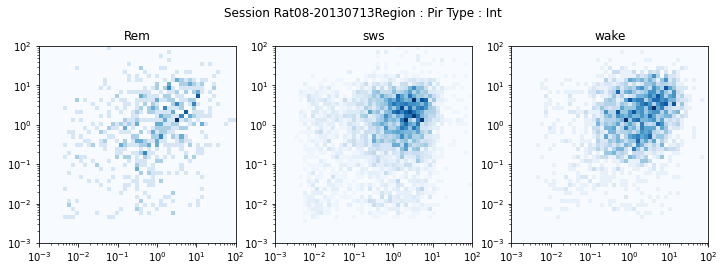

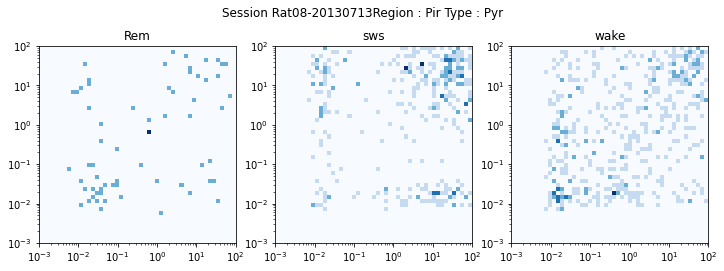

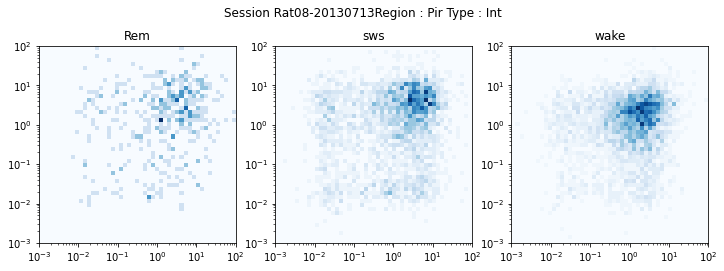

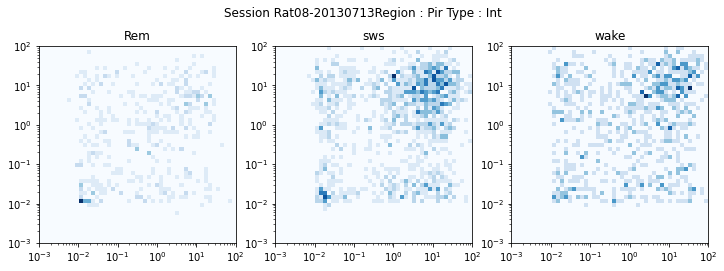

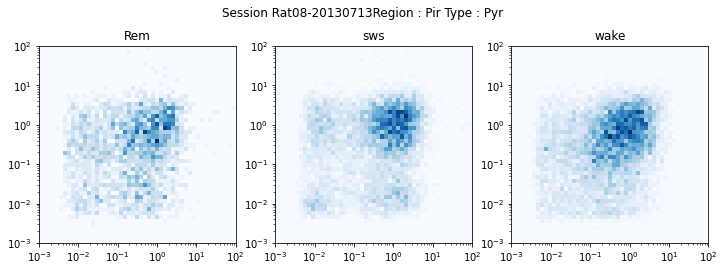

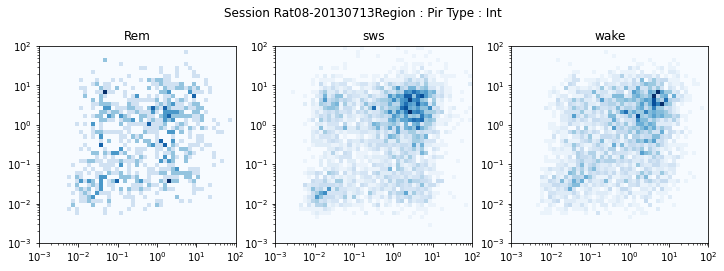

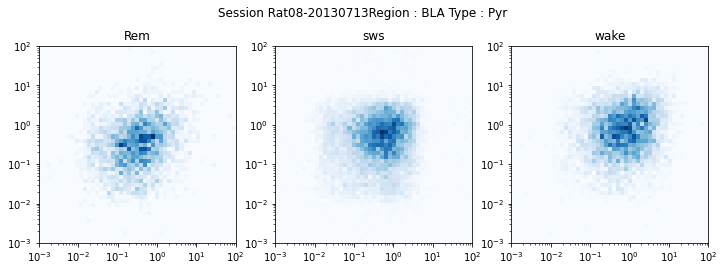

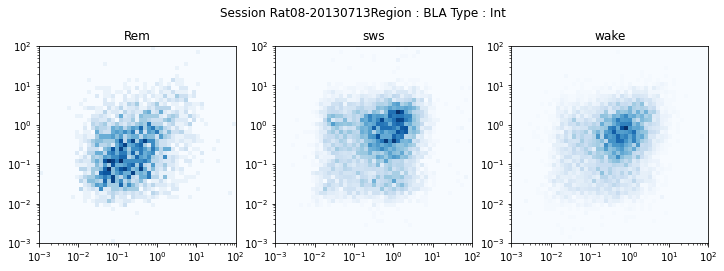

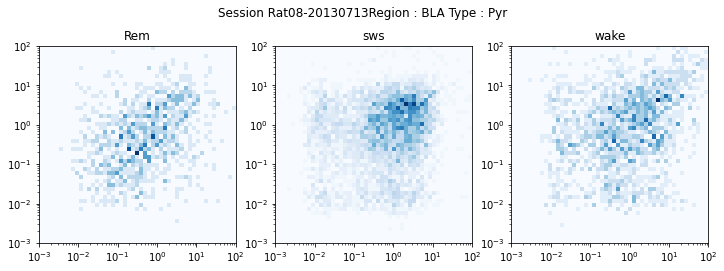

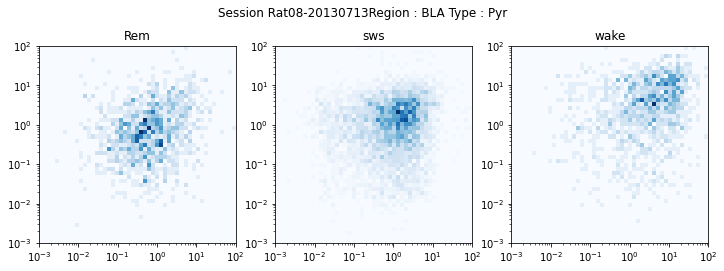

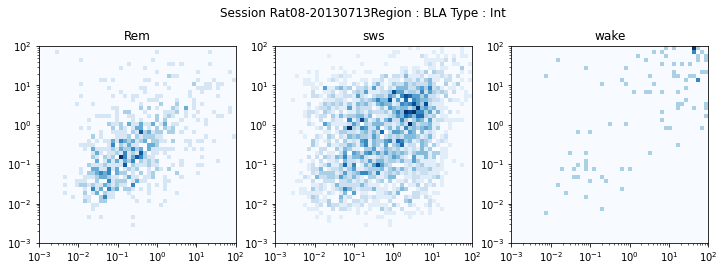

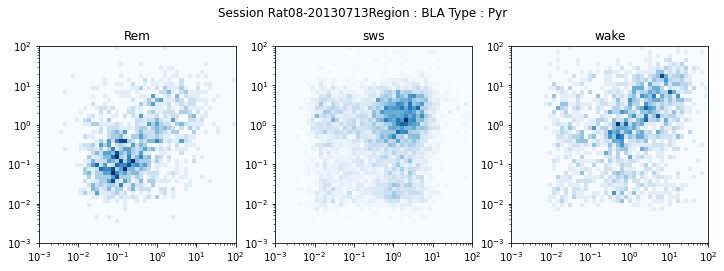

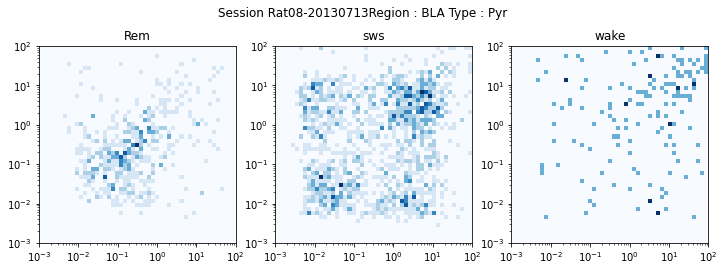

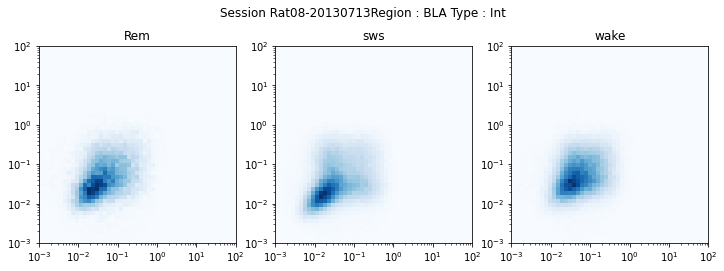

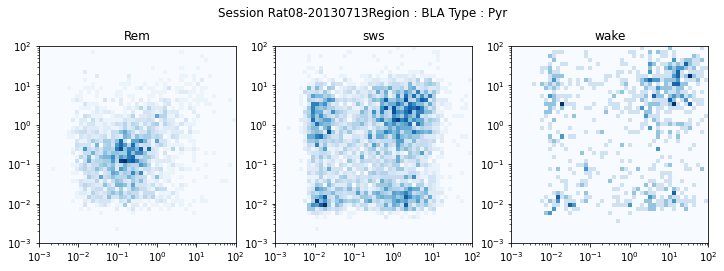

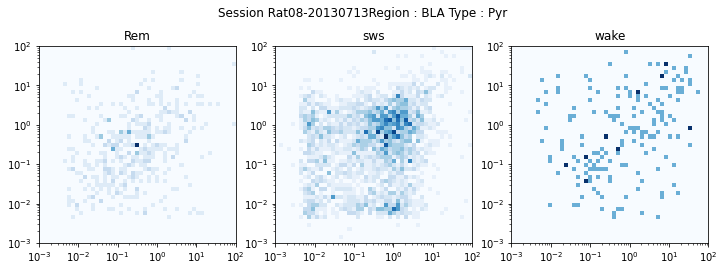

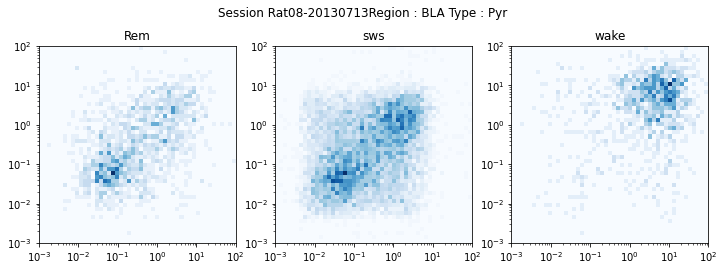

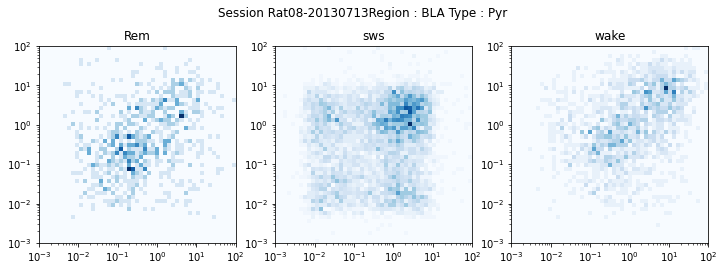

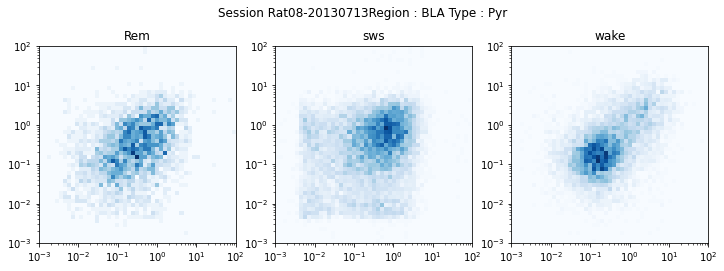

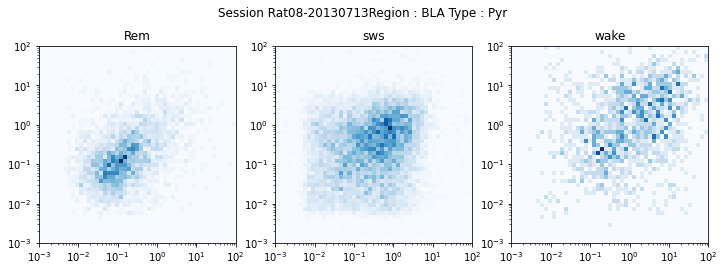

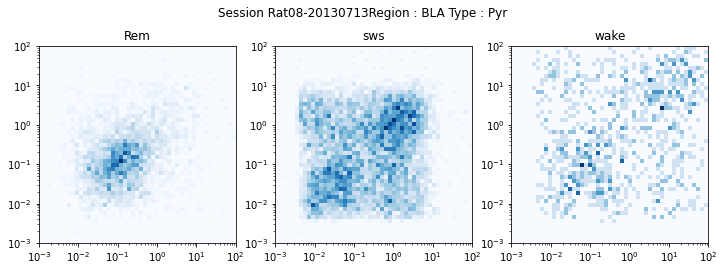

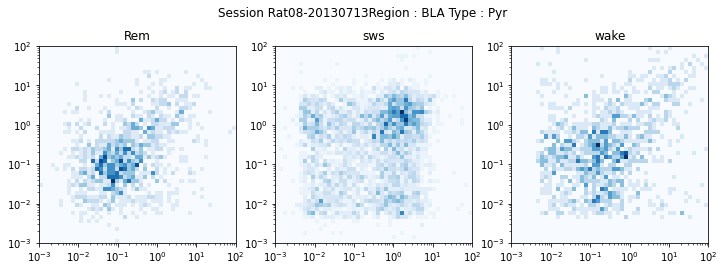

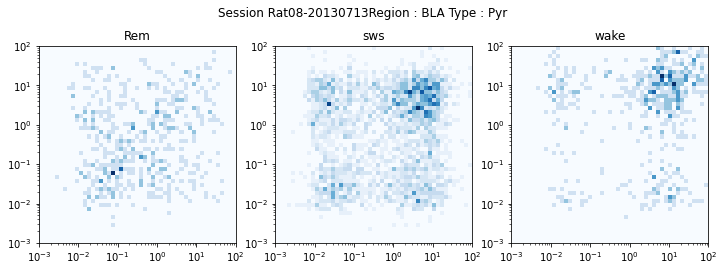

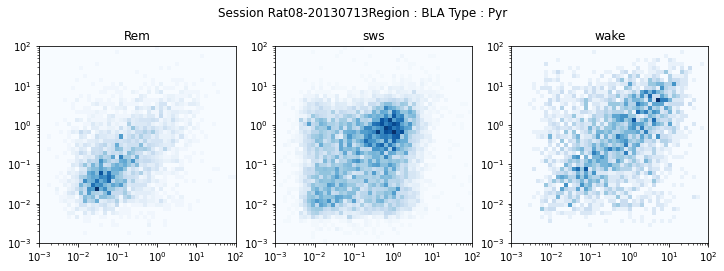

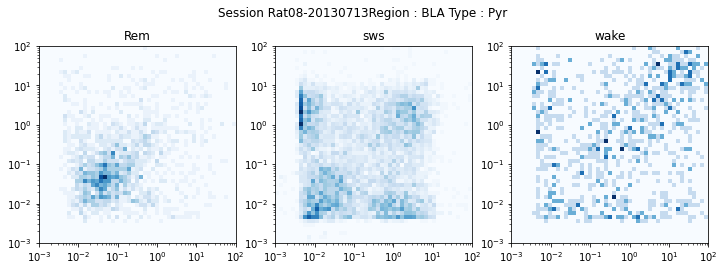

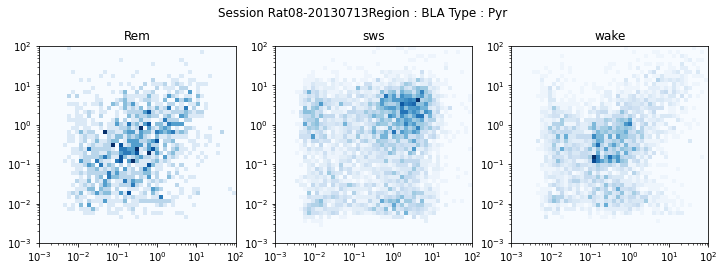

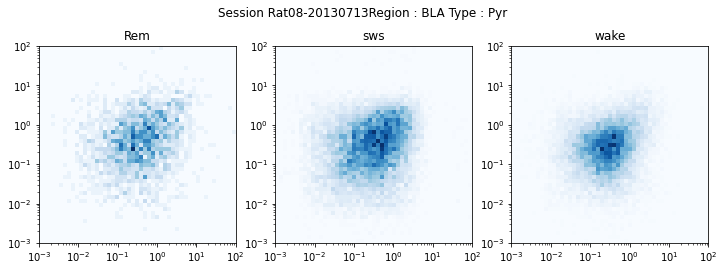

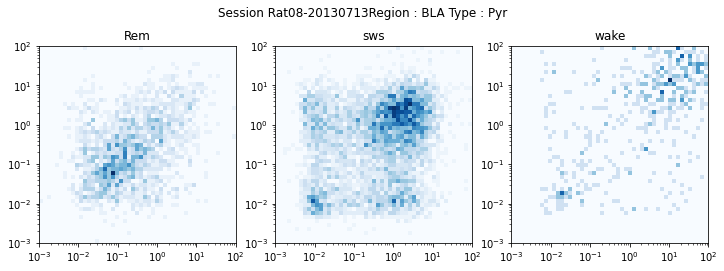

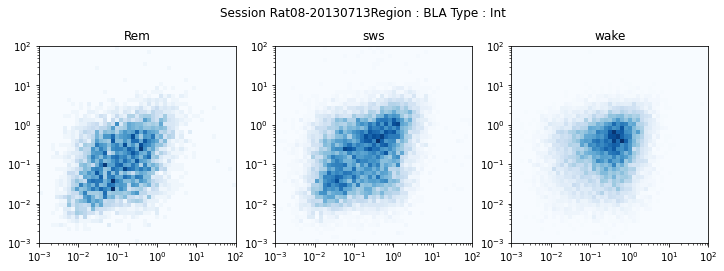

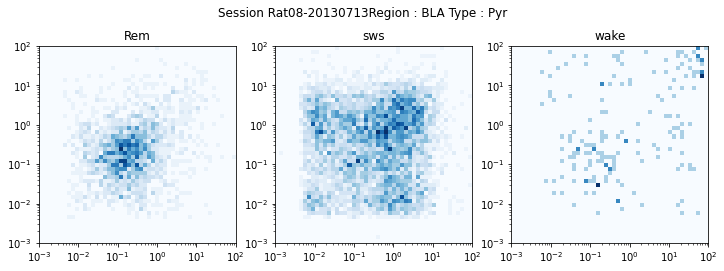

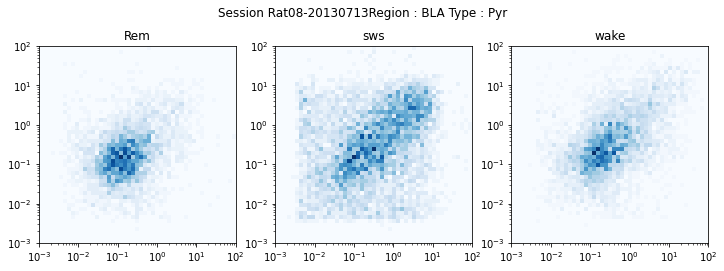

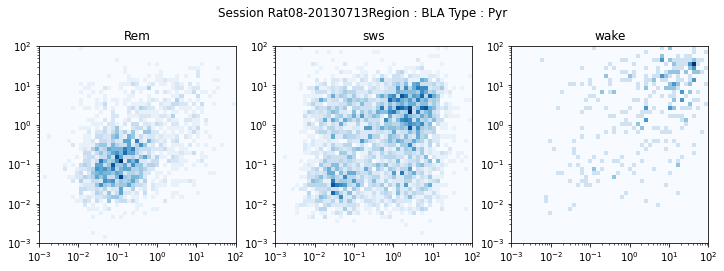

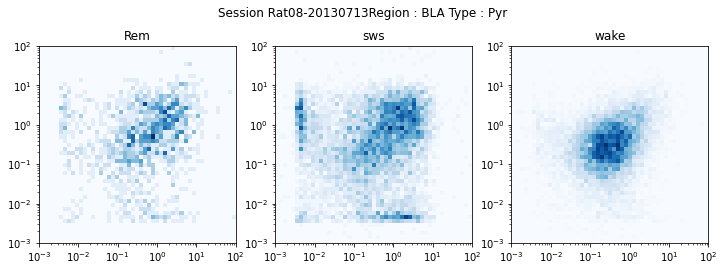

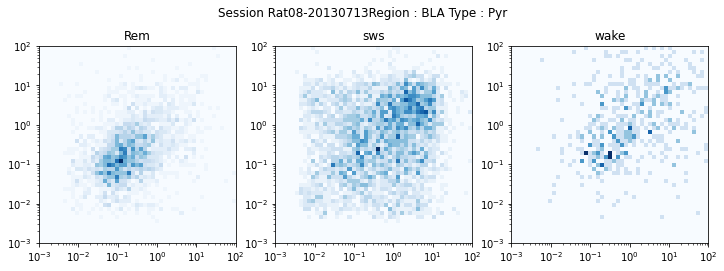

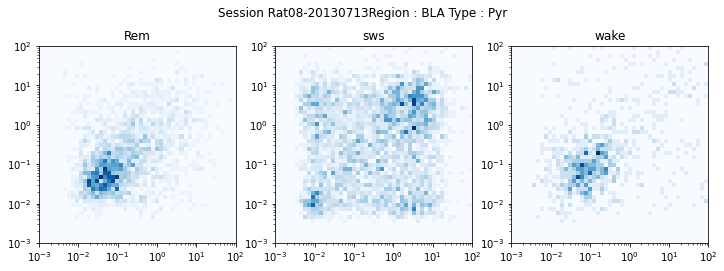

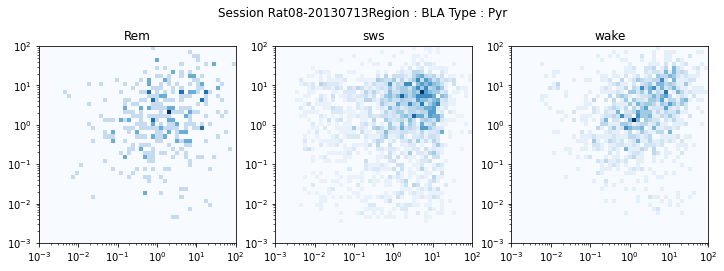

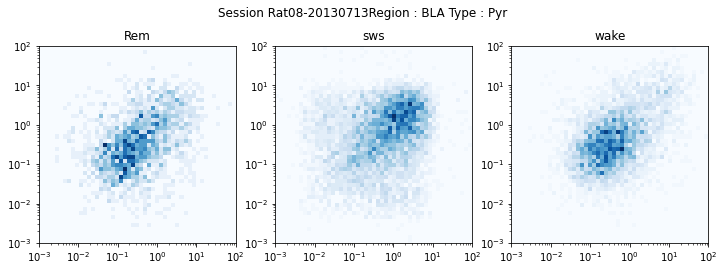

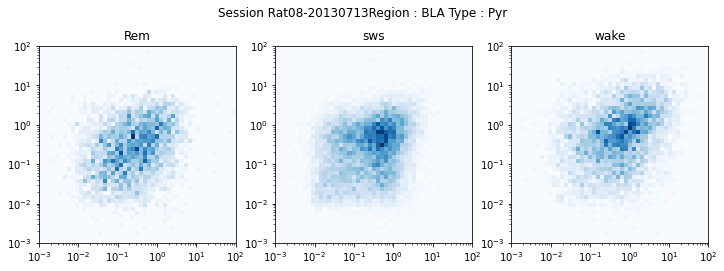

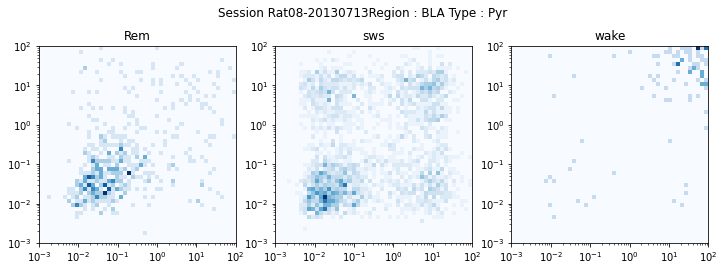

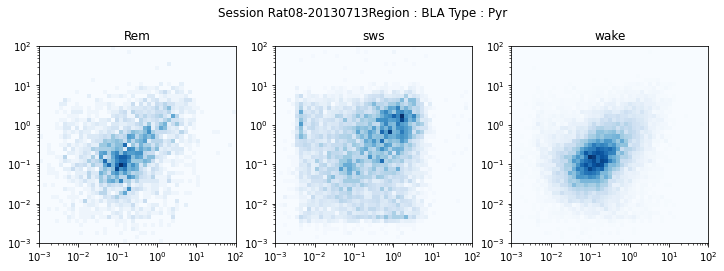

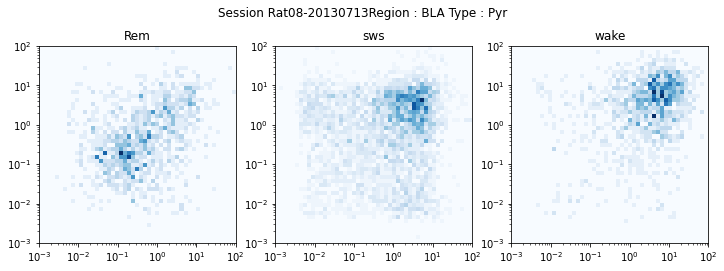

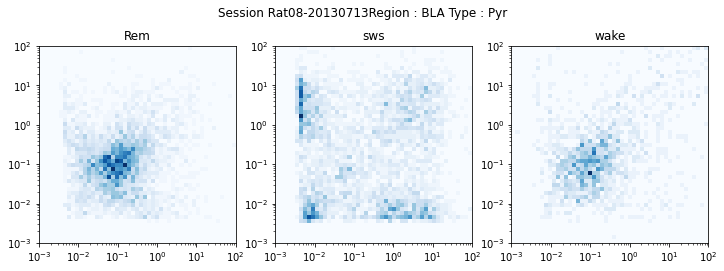

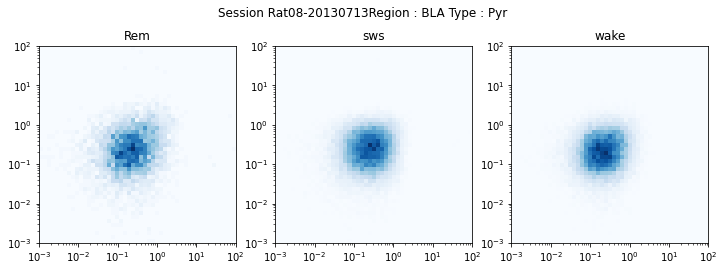

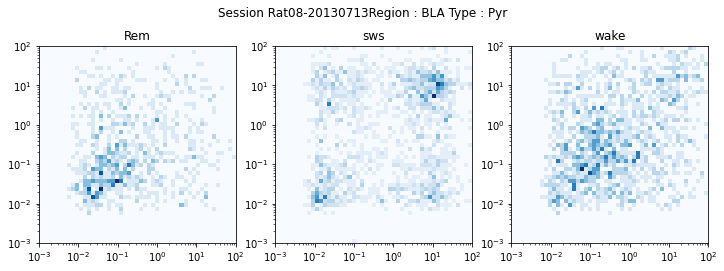

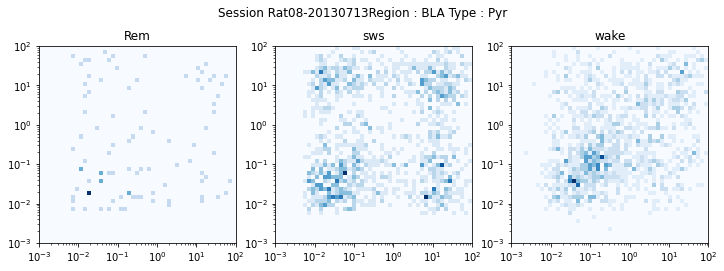

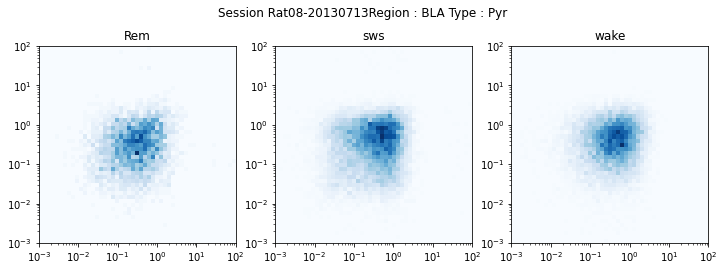

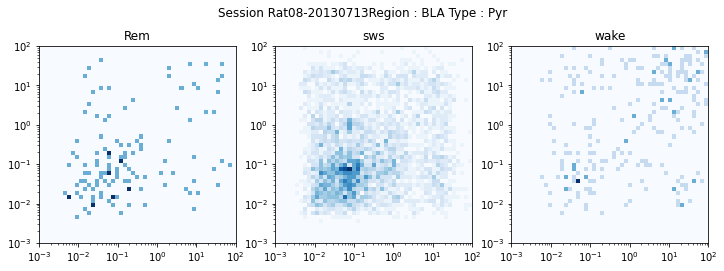

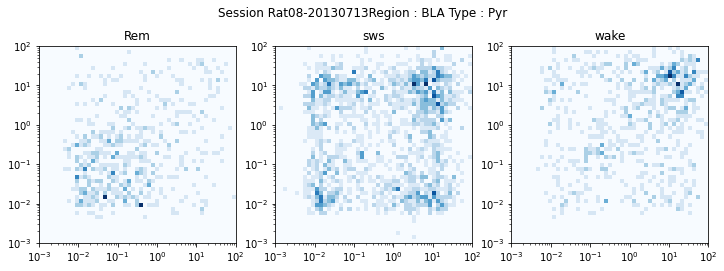

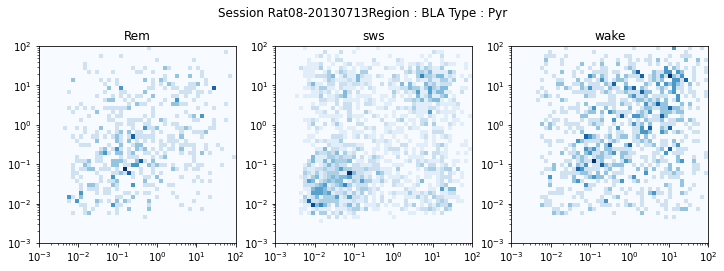

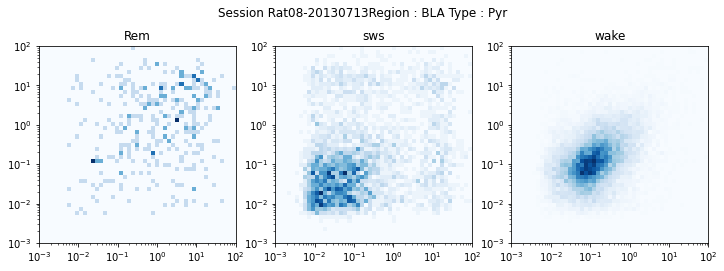

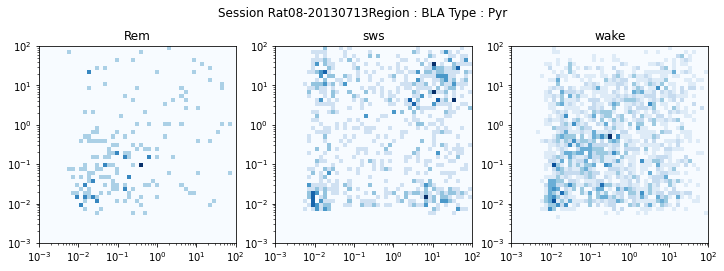

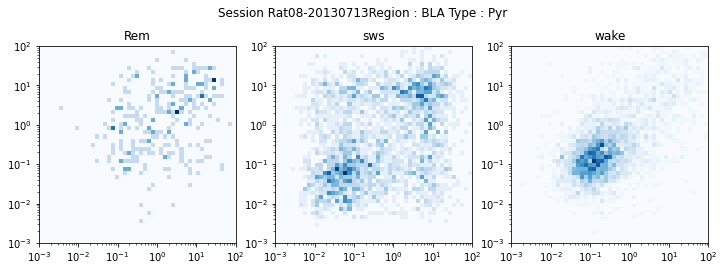

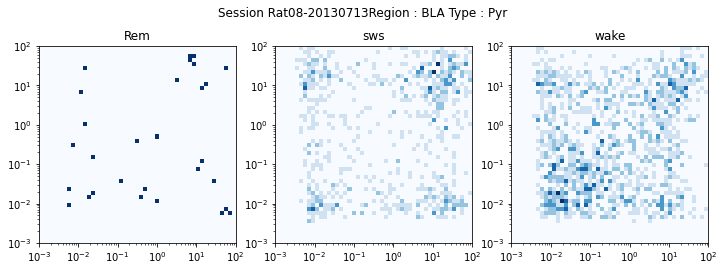

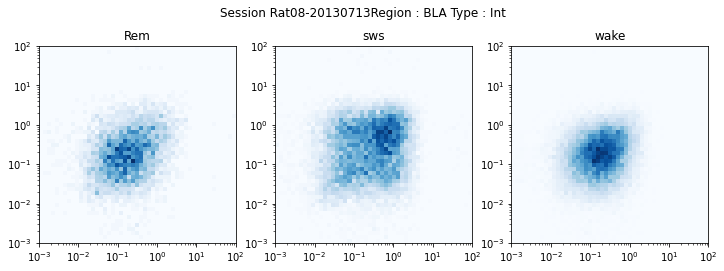

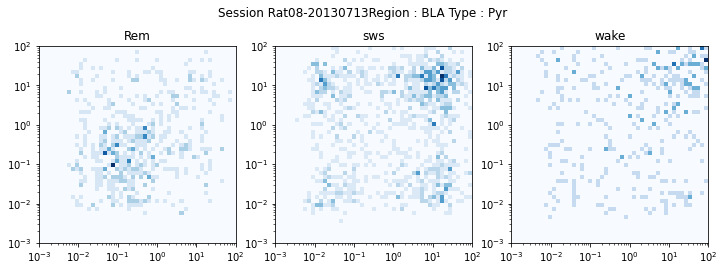

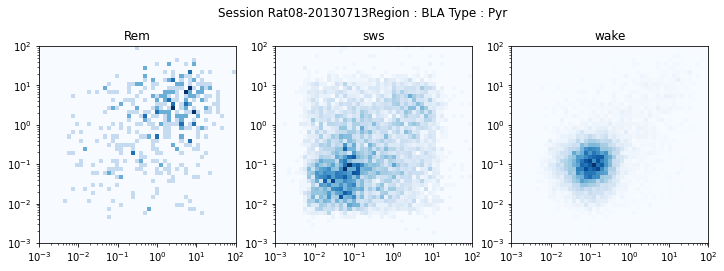

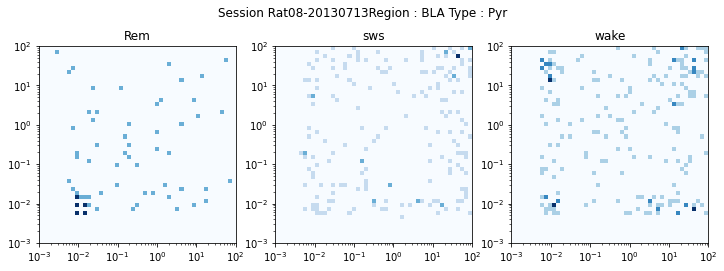

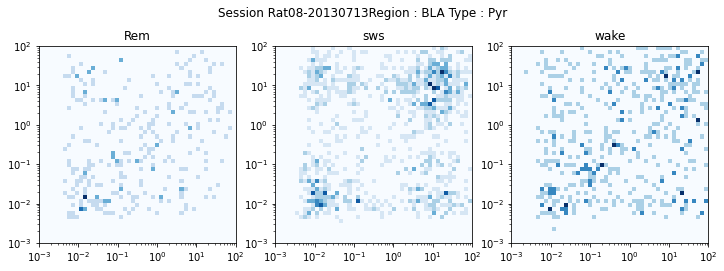

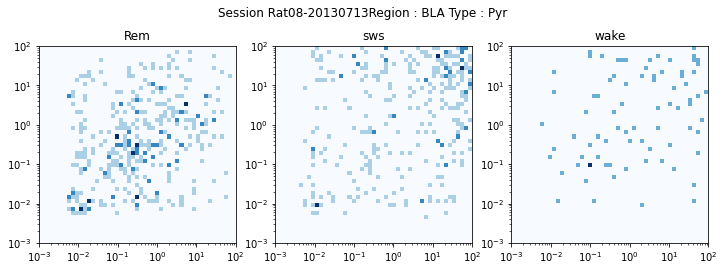

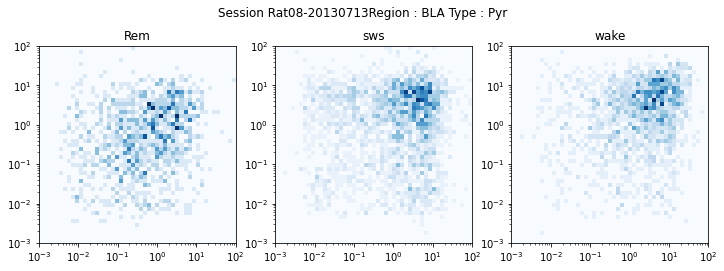

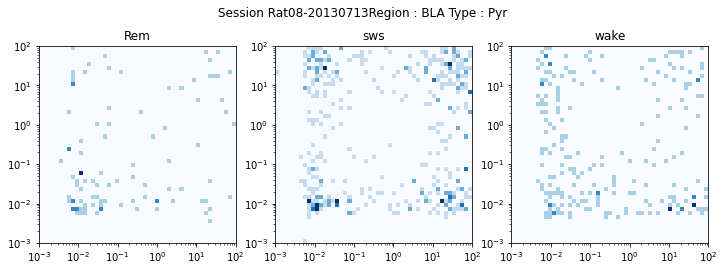

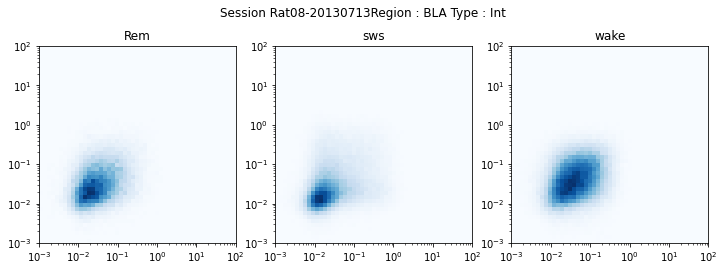

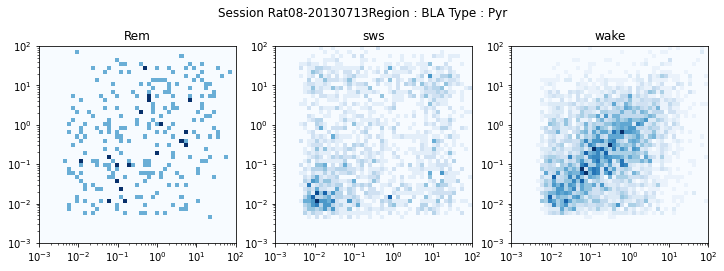

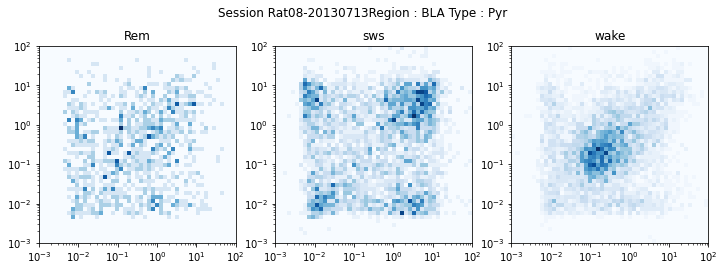

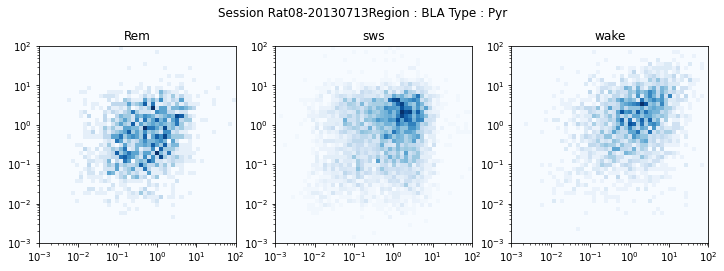

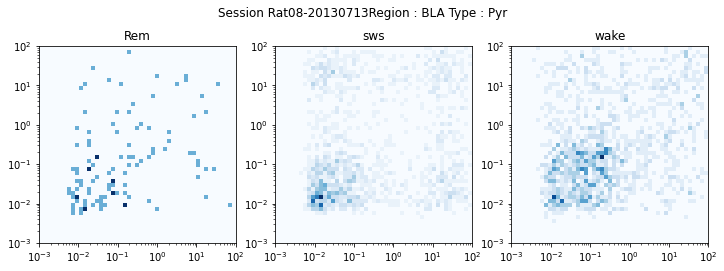

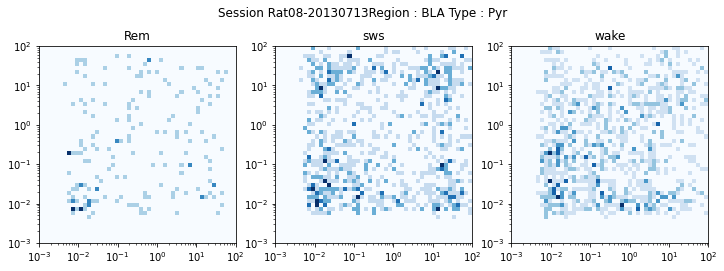

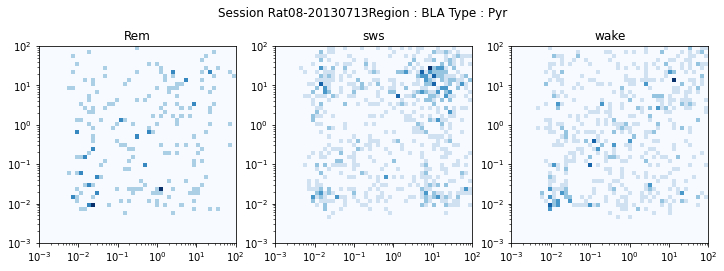

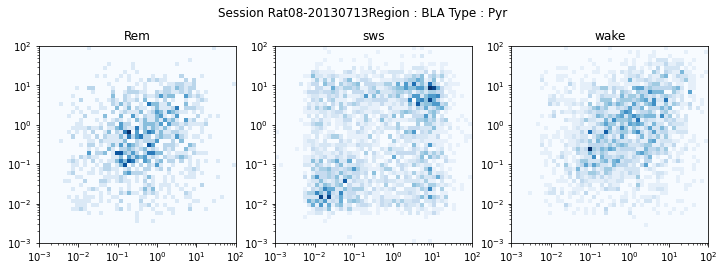

In [63]:
main('Rat08/Rat08-20130713',[])

In [ ]:
bk.load.batch(main,[None],True,True)

In [3]:
import neuroseries as nts

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import scipy.ndimage
import os

import scipy.signal
import scipy.stats

import bk.load as bk
import bk.plot
import bk.compute

In [55]:
def isi_population(base_folder, local_path, *args, **kwargs):

    bk.load.current_session_linux(base_folder, local_path)
    neurons, metadata = bk.load.spikes()
    states = bk.load.states()
    isi = {'Rem': {},
           'sws':{},
           'wake_homecage':{}}
    for stru in np.unique(metadata.Region):
        for state in ['Rem', 'sws', 'wake_homecage']:
            all_region_spikes = np.sort(np.concatenate(
                [n.restrict(states[state]).times('s') for n in neurons[(metadata.Region == stru) & (metadata.Type == 'Int')]]))
            isi[state].update({stru:np.diff(all_region_spikes)})
    return isi


In [60]:
isi = isi_population('/mnt/electrophy/Gabrielle/GG-Dataset-Light/','Rat08/Rat08-20130713')

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /mnt/electrophy/Gabrielle/GG-Dataset-Light/Rat08/Rat08-20130713
Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy


Rat : 8 on day : 6
Working with session Rat08-20130713 @ /mnt/electrophy/Gabrielle/GG-Dataset-Light/Rat08/Rat08-20130713
Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy
(3, 4)


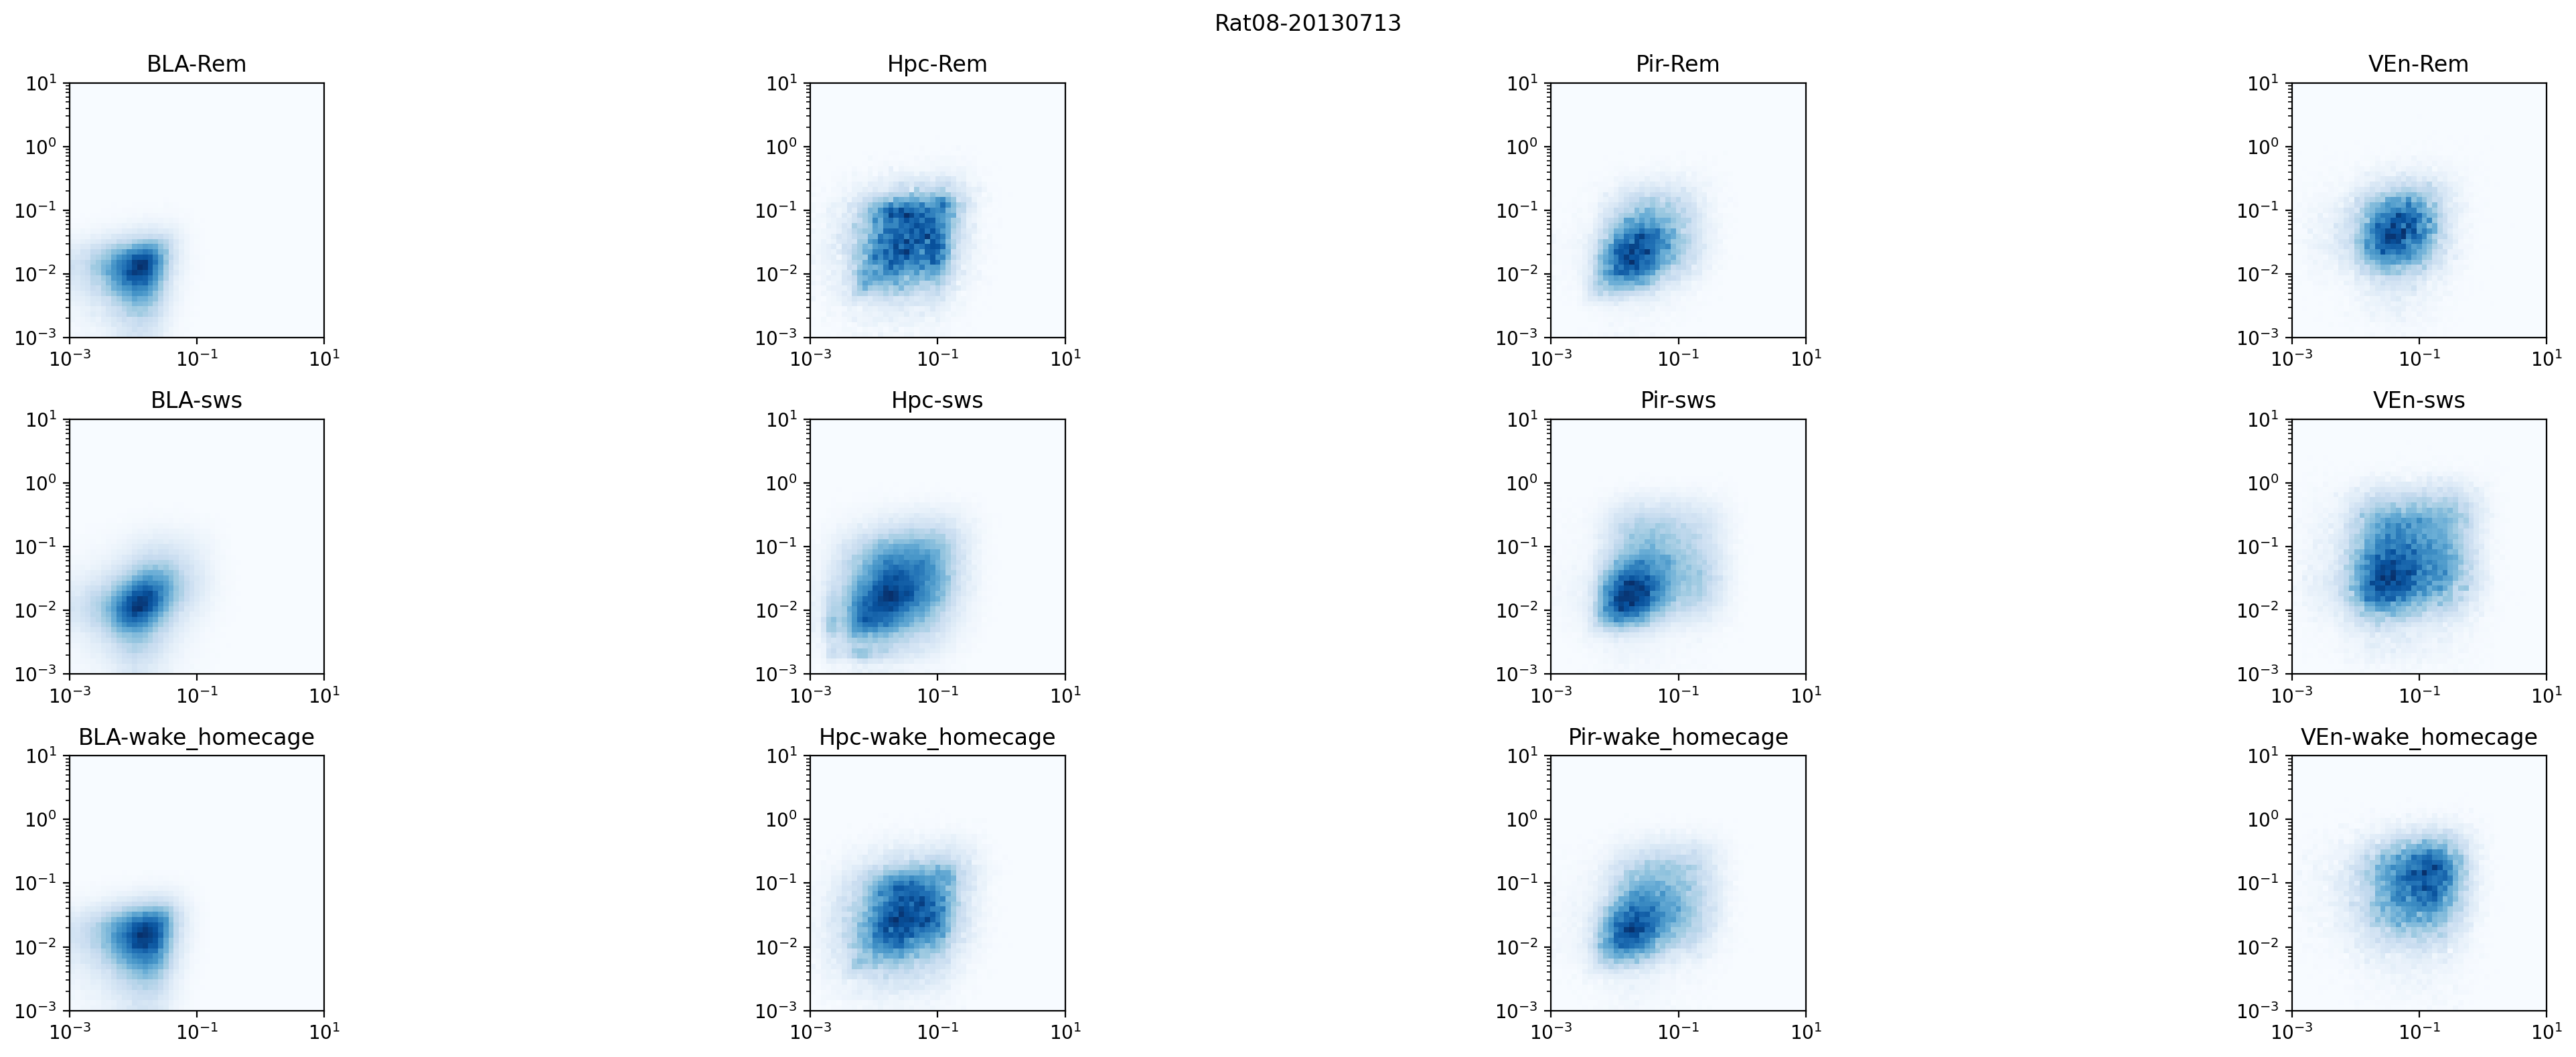

In [66]:
bk.load.current_session_linux(local_path = 'Rat08/Rat08-20130713')
neurons, metadata = bk.load.spikes()

bins = np.logspace(np.log10(0.001), np.log10(10), 50)
structures = np.unique(metadata.Region)
fig, axes = plt.subplots(len(isi.keys()), len(
    structures), figsize=(24, 8), dpi=200)
print(axes.shape)
for stru, axe in zip(structures, axes.T):
    for state, ax in zip(isi.keys(), axe):
        isi_tmp_n = isi[state][stru]
        isi_tmp_n1 = np.roll(isi_tmp_n, 1)
        h, x, y, _ = ax.hist2d(isi_tmp_n, isi_tmp_n1, bins=bins, cmap='Blues')
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_aspect('equal')
        ax.set_title(stru + '-' + state)
plt.suptitle(bk.load.session)
plt.tight_layout()

/tmp/ipykernel_634579/3409337379.py:5: RuntimeWarning: divide by zero encountered in log10
  log_isi = np.log10(isi[state][stru]/1_000_000)


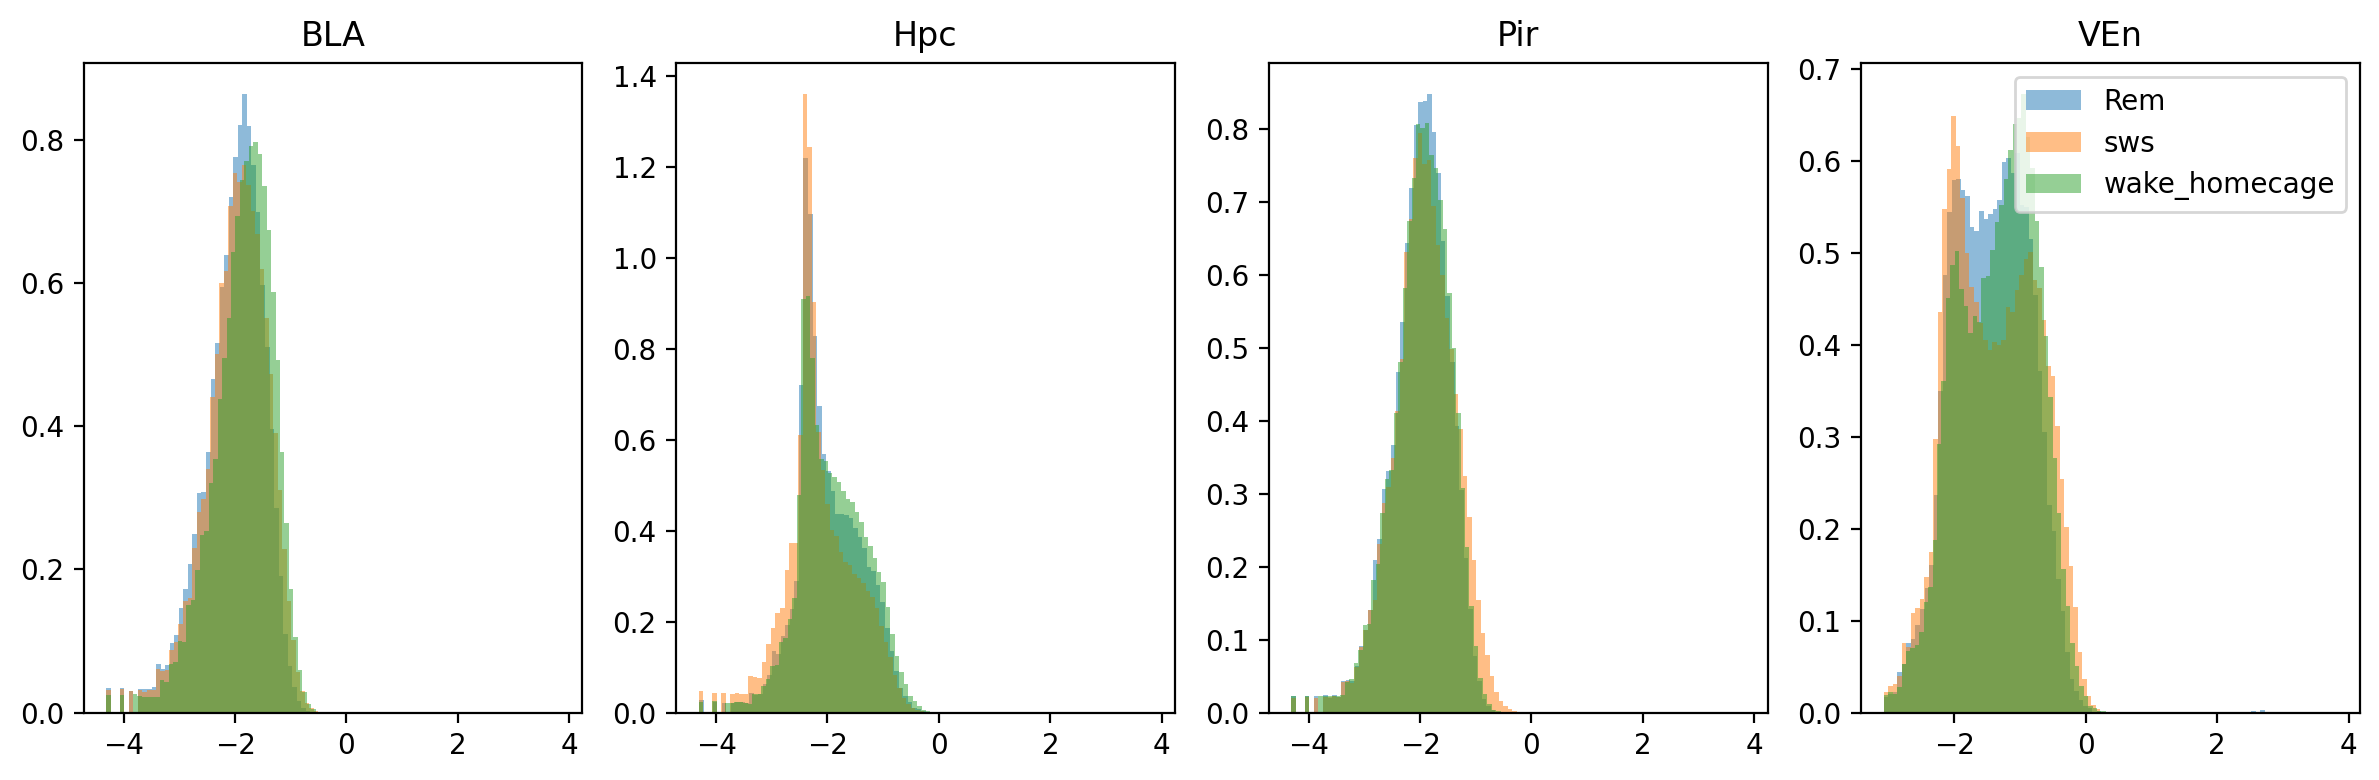

In [20]:
structures = np.unique(metadata.Region)
fig,axes = plt.subplots(1,len(structures),figsize = (12,4),dpi = 200)
for stru,ax in zip(structures,axes):
    for state in isi.keys():
        log_isi = np.log10(isi[state][stru]/1_000_000)
        log_isi = log_isi[np.isfinite(log_isi)]
        ax.hist(log_isi,100,alpha = 0.5,density=True)
        ax.set_title(stru)
    plt.legend(isi.keys())
plt.tight_layout()

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /mnt/electrophy/Gabrielle/GG-Dataset-Light/Rat08/Rat08-20130713
Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy


(3, 4)


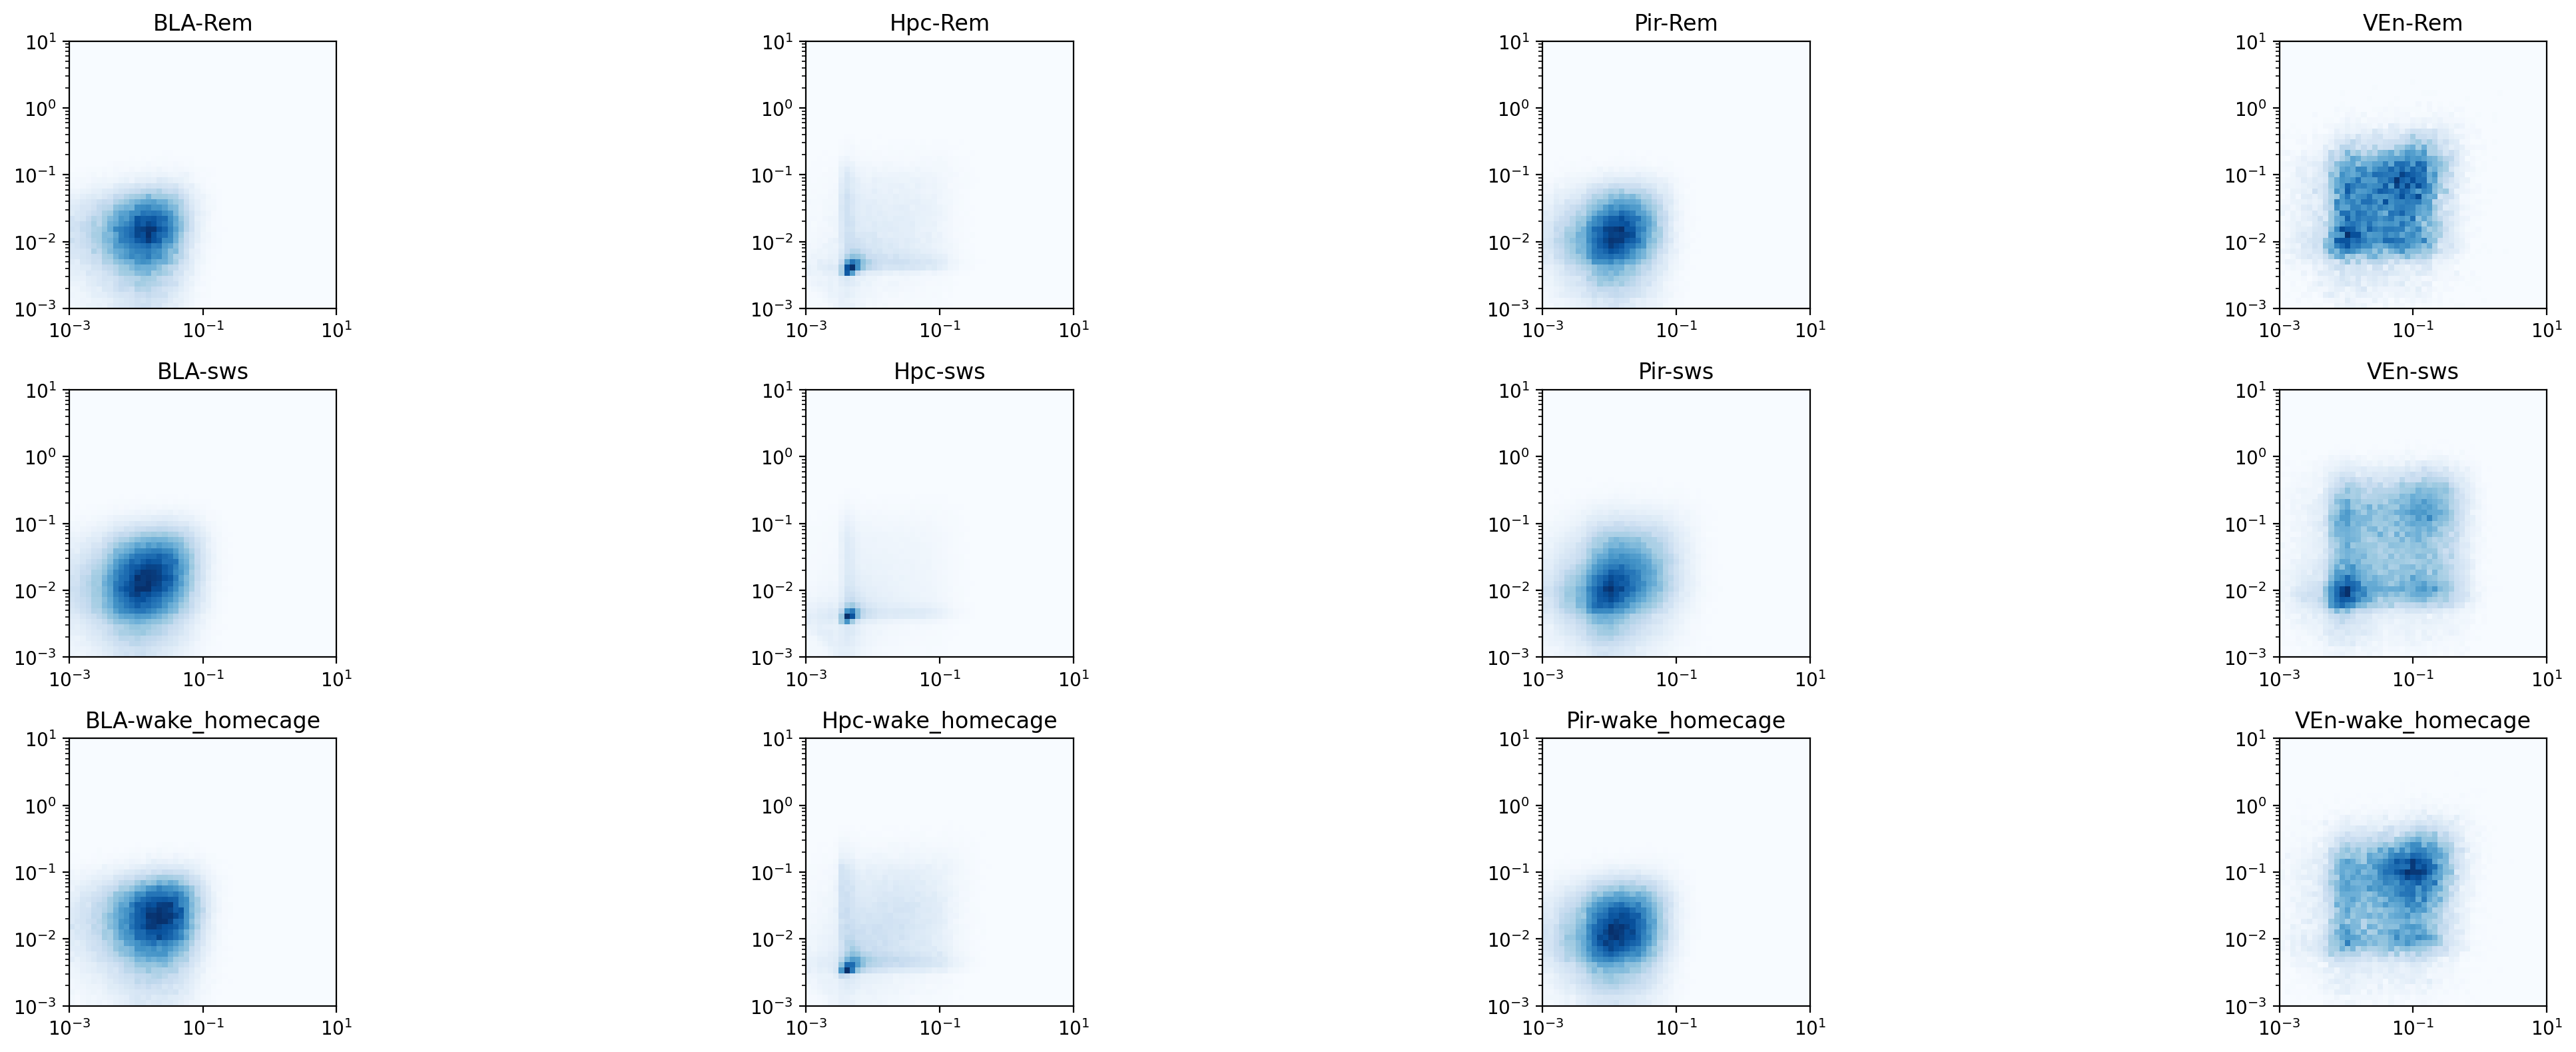

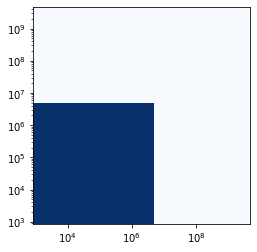

In [22]:
h,x,y,_ = plt.hist2d(isi_tmp_n,isi_tmp_n1,bins = 100,cmap = 'Blues')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.gca().set_aspect('equal')

In [ ]:
h,x,y,_ = plt.hist2d(isi_tmp_n,isi_tmp_n1,bins = bins,cmap = 'Blues')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.gca().set_aspect('equal')

In [4]:
    bk.load.current_session_linux()
    neurons, metadata = bk.load.spikes()


Rat : 8 on day : 6
Working with session Rat08-20130713 @ /mnt/electrophy/Gabrielle/GG-Dataset-Light/Rat08/Rat08-20130713
Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy


In [17]:
s = np.hstack([n.times('s') for n in neurons])

In [94]:
np.histogram(isi['Rem']['BLA'])

(array([318870,      2,      1,      0,      0,      0,      0,      0,
             0,      1]),
 array([0.00000000e+00, 6.74403540e+08, 1.34880708e+09, 2.02321062e+09,
        2.69761416e+09, 3.37201770e+09, 4.04642124e+09, 4.72082478e+09,
        5.39522832e+09, 6.06963186e+09, 6.74403540e+09]))